<a href="https://colab.research.google.com/github/delfinawerlen/Data-Science-Werlen/blob/main/Data_StoryTelling_Werlen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**PROYECTO DATA SCIENCE**


El siguiente trabajo intentará encontrar patrones en el comportamiento de los clientes de una plataforma de compras online. El dataset comprende información sobre cada transacción, incluyendo ID de cliente, edad, género, artículo comprado, categoría, monto de la compra en USD, ubicación, tamaño, color, temporada de compra, calificación de revisión, estado de suscripción, tipo de envío, descuento aplicado, código de promoción utilizado, compras anteriores, método de pago y frecuencia de compras.

El objetivo principal se centra en anticipar la **satisfacción del cliente**, es decir, la calificación de revisión o "review rating" proporcionada por el cliente en función de diversos factores como la productos comprados, método de pago, envío, descuento, temporada y monto. Se busca analizar las relaciones y determinar las causas cuando se identifica una calificación alta, con el propósito de mantener esos aspectos destacados. Asimismo, se pretende abordar las bajas calificaciones para detectar causas raiz de la puntuación e implementar cambios.

Como secundario, se intentara identificar tendencias de compra, factores que influyen en las decisiones de los clientes y posibles segmentaciones dentro de la base de usuarios. A continuación se mencionarán algunos ejemplos:

*   Cómo varía el monto de compra en relación con la edad y la frecuencia de compras.
*   ¿El descuento aplicado o el uso de códigos promocionales afectan la calificación de revisión y la lealtad del cliente?
*   ¿Existe una relación entre el monto pagado y el medio de pago?
*   ¿Existe una preferencia de temporada en la elección de artículos?
*   ¿Influye la localización en las categorias de compras y montos?
*   ¿Se relaciona la satisfacción del cliente con la suscripción y compras anteriores?

La comprensión profunda de estos datos puede llevar a comprender los aspectos más importantes para los clientes y generar estrategias para mejorar su atención, incrementar las ventas y retener clientes.

La audiencia de este análisis son los comercios de indumentaria y accesorios, donde podrán implementar estrategias según el comportamiento de los clientes.

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# @title
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Shopping Trends

**DATA SET "SHOPPING TRENDS"**

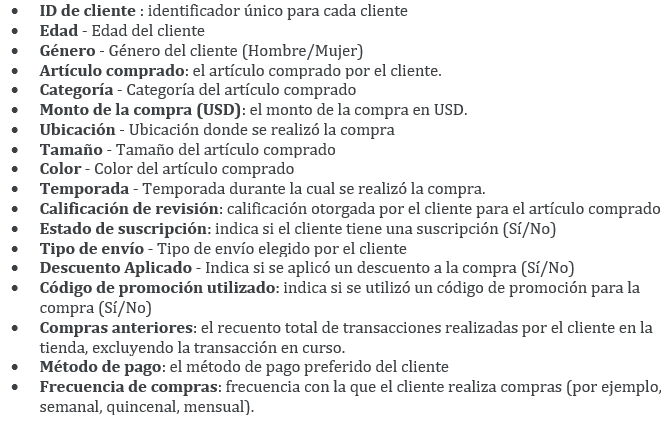


Link: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset



### Importación del dataset

In [ ]:
# @title
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('shopping_trends.csv',sep=',')
df.head()

/content/gdrive/MyDrive


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [ ]:
df.shape

(3900, 19)

In [ ]:
# @title
df.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

# Limpieza de datos




Se visualiza la tabla

In [ ]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

Se visualiza si hay valores nulos

In [ ]:
# @title
valores_nulos = df.isnull().sum()
print(valores_nulos)


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


se chequea pero con valores no nulos

In [ ]:
# @title
valores_no_nulos = df.notnull().sum()
print(valores_no_nulos)

Customer ID                 3900
Age                         3900
Gender                      3900
Item Purchased              3900
Category                    3900
Purchase Amount (USD)       3900
Location                    3900
Size                        3900
Color                       3900
Season                      3900
Review Rating               3900
Subscription Status         3900
Payment Method              3900
Shipping Type               3900
Discount Applied            3900
Promo Code Used             3900
Previous Purchases          3900
Preferred Payment Method    3900
Frequency of Purchases      3900
dtype: int64


Conclusión

---

no se encontraron valores nulos


Verificar la existencia de Outliers en distintas columnas con el metodo de los 1.5 rangos intercuartílicos.


In [ ]:
# @title
# Lista de columnas
columnas_verificar = ['Age', 'Purchase Amount (USD)', 'Review Rating','Previous Purchases']

outliers = pd.DataFrame()

for columna in columnas_verificar:

    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_columna = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    outliers = pd.concat([outliers, outliers_columna])

outliers = outliers.drop_duplicates()

print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []


reverificación

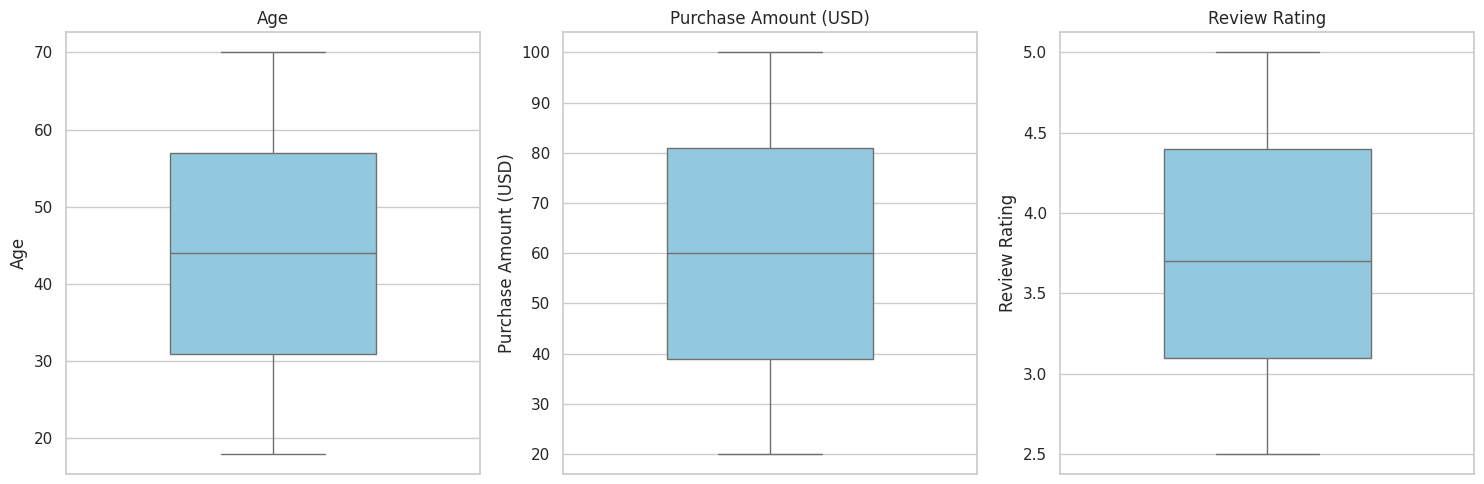

In [ ]:
# @title
sns.set(style="whitegrid")
columnas_verificar = ['Age', 'Purchase Amount (USD)', 'Review Rating']

fig, axs = plt.subplots(1, len(columnas_verificar), figsize=(15, 5))

for i, columna in enumerate(columnas_verificar):
    sns.boxplot(data=df[columna], ax=axs[i], orient="v", width=0.5, color='skyblue')
    axs[i].set_title(columna)

plt.tight_layout()
plt.show()

Conclusión

---

No se detectan outliers en el dataframe para las columnas numéricas

Se verifica la distrbución en las columnas categoricas

<ipython-input-11-def5da6e7de1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columna, ax=axs[i], palette="Set3")
<ipython-input-11-def5da6e7de1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columna, ax=axs[i], palette="Set3")
<ipython-input-11-def5da6e7de1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columna, ax=axs[i], palette="Set3")
<ipython-input-11-def5da6e7de1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

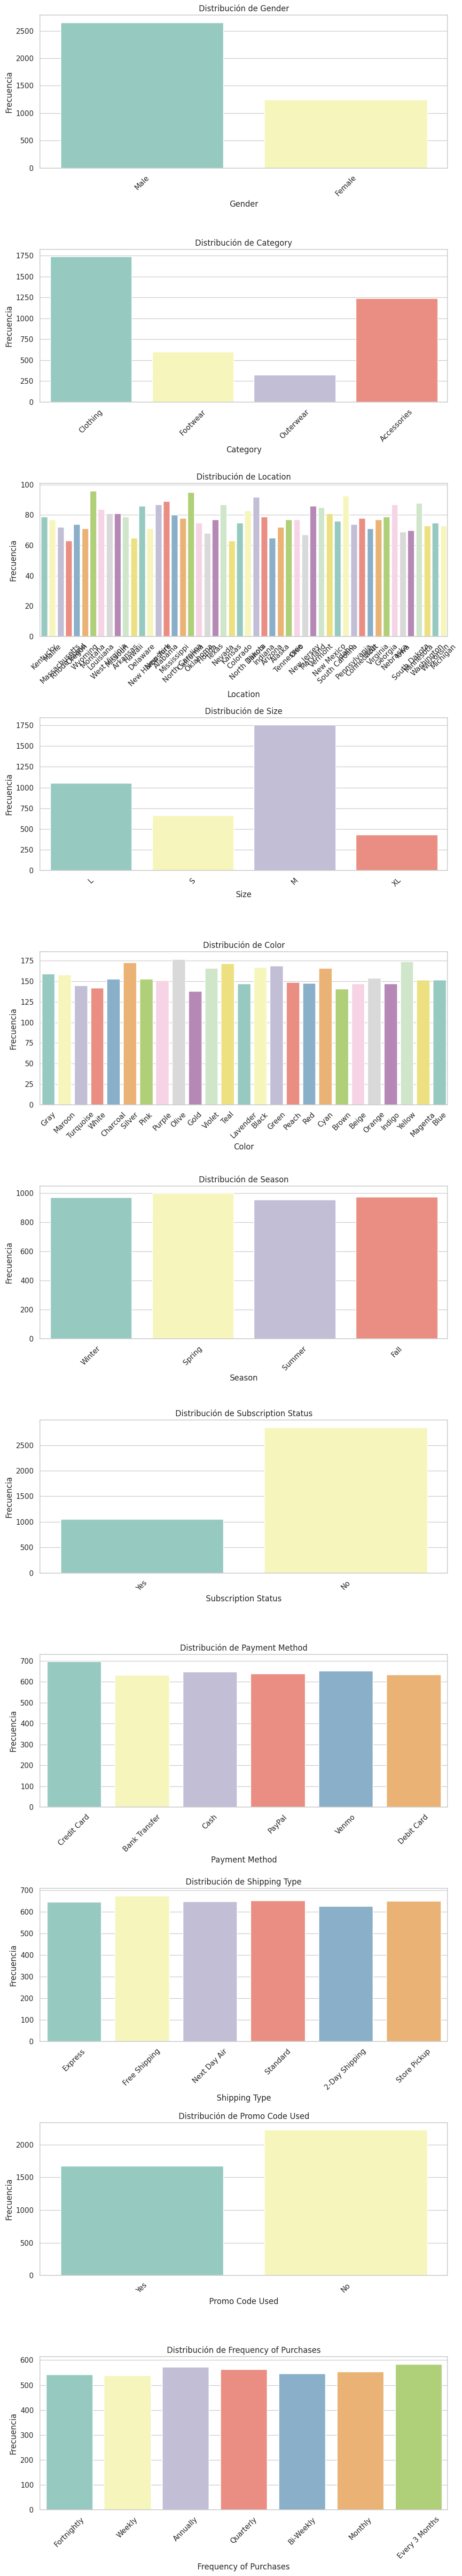

In [ ]:
# @title
sns.set(style="whitegrid")

columnas_categoricas = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season',
                        'Subscription Status', 'Payment Method', 'Shipping Type', 'Promo Code Used',
                        'Frequency of Purchases']
fig, axs = plt.subplots(len(columnas_categoricas), 1, figsize=(10, len(columnas_categoricas)*5))

for i, columna in enumerate(columnas_categoricas):
    sns.countplot(data=df, x=columna, ax=axs[i], palette="Set3")
    axs[i].set_title(f'Distribución de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Conclusión

---

No se detectan anomalias en los datos

# Análisis

##DATOS

### Importación

In [ ]:

# Configuración de estilo para Seaborn
sns.set(style="whitegrid")

### Descripción de variables númericas no categoricas

In [ ]:
# @title
columnas_seleccionadas = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases' ]
df[columnas_seleccionadas].describe()


Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000

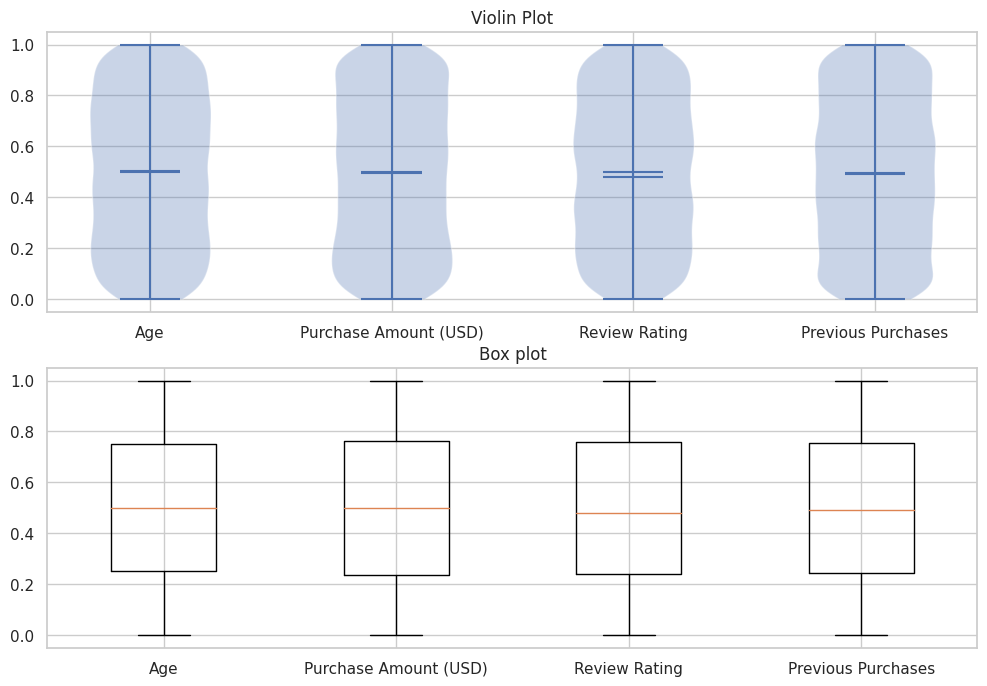

In [ ]:
# @title
columnas_numericas = df.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
train_to_plot = scaler.fit_transform(df.loc[:, columnas_seleccionadas])
train_to_plot = pd.DataFrame(data=train_to_plot, columns = columnas_seleccionadas)


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


axs[0].violinplot(train_to_plot.dropna().astype('float64'),
                    showmeans=True,
                    showmedians=True)
axs[0].set_title('Violin Plot')
axs[0].set_xticks(range(1, len(columnas_seleccionadas) + 1))
axs[0].set_xticklabels(columnas_seleccionadas)

# plot box plot
axs[1].boxplot(train_to_plot.dropna().astype('float64'))
axs[1].set_title('Box plot')
axs[1].set_label(columnas_seleccionadas)
axs[1].set_xticks(range(1, len(columnas_seleccionadas) + 1))
axs[1].set_xticklabels(columnas_seleccionadas)

plt.show()

Observación

---

Se puede notar que las distribuciones de las variables númericas no categoricas son de normales

### Contador de datos   

In [ ]:
# @title
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

A continuación, se visualizará la cantidad de repeticiones de cada una de las variables categóricas, tanto en una lista con sus valores, como en gráficos para poder comprender y diferenciar las distintas cantidades y proporciones en cada caso.

Gender : 

        Gender
Female    1248
Male      2652


<Figure size 1000x600 with 0 Axes>

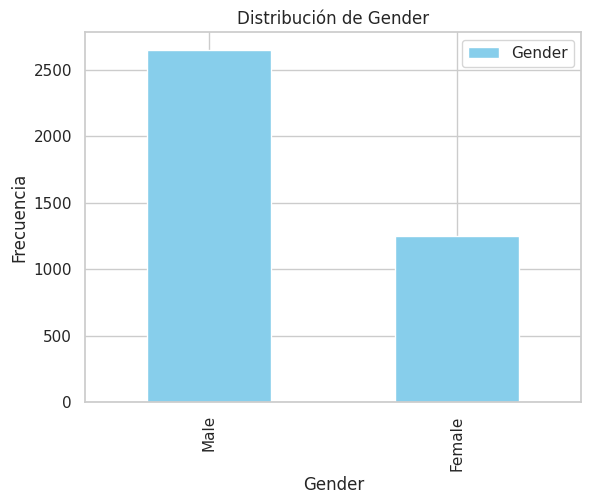

__________________________________________________
Category : 

             Category
Outerwear         324
Footwear          599
Accessories      1240
Clothing         1737


<Figure size 1000x600 with 0 Axes>

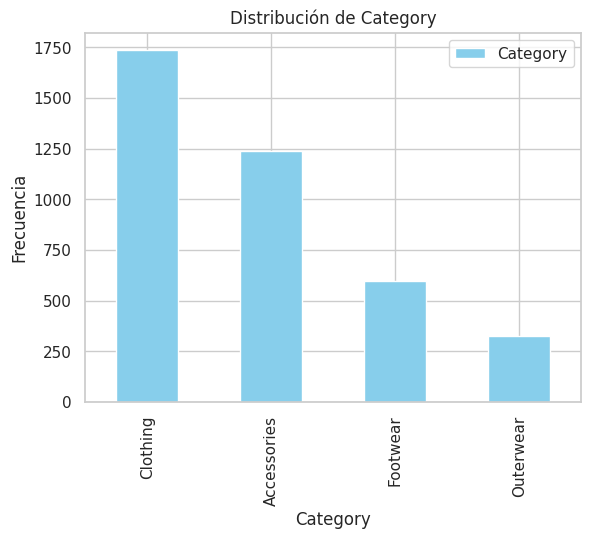

__________________________________________________
Location : 

                Location
Rhode Island          63
Kansas                63
Hawaii                65
Arizona               65
New Jersey            67
Florida               68
Iowa                  69
South Dakota          70
New Hampshire         71
Utah                  71
Wyoming               71
Massachusetts         72
Alaska                72
Washington            73
Michigan              73
Pennsylvania          74
Oregon                74
Wisconsin             75
Oklahoma              75
Colorado              75
South Carolina        76
Maine                 77
Texas                 77
Tennessee             77
Ohio                  77
Virginia              77
North Carolina        78
Connecticut           78
Arkansas              79
Kentucky              79
Georgia               79
Indiana               79
Mississippi           80
New Mexico            81
West Virginia         81
Missouri              81
North Dakot

<Figure size 1000x600 with 0 Axes>

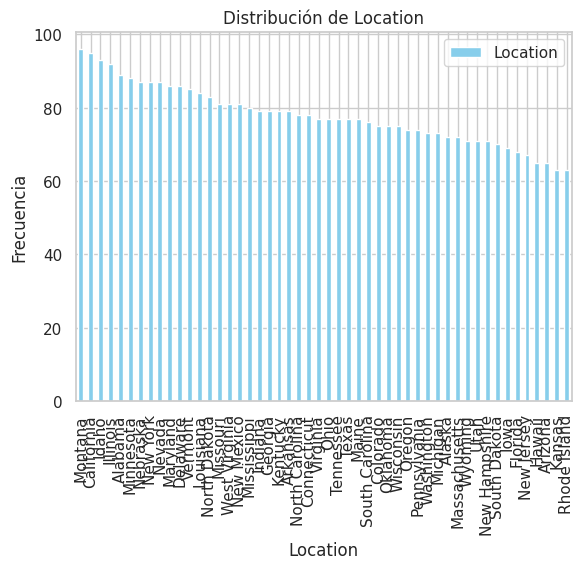

__________________________________________________
Size : 

    Size
XL   429
S    663
L   1053
M   1755


<Figure size 1000x600 with 0 Axes>

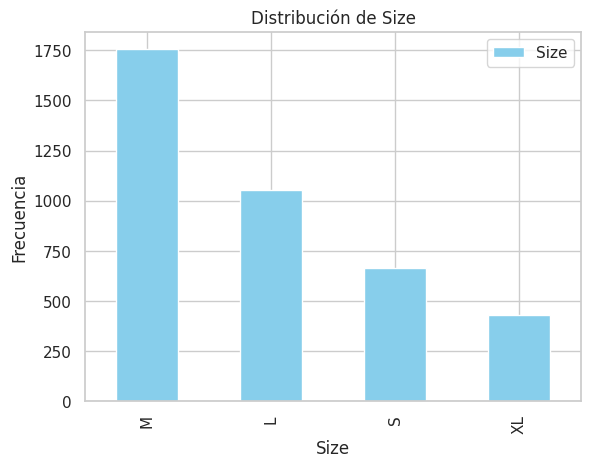

__________________________________________________
Color : 

           Color
Gold         138
Brown        141
White        142
Turquoise    145
Lavender     147
Indigo       147
Beige        147
Red          148
Peach        149
Purple       151
Blue         152
Magenta      152
Pink         153
Charcoal     153
Orange       154
Maroon       158
Gray         159
Violet       166
Cyan         166
Black        167
Green        169
Teal         172
Silver       173
Yellow       174
Olive        177


<Figure size 1000x600 with 0 Axes>

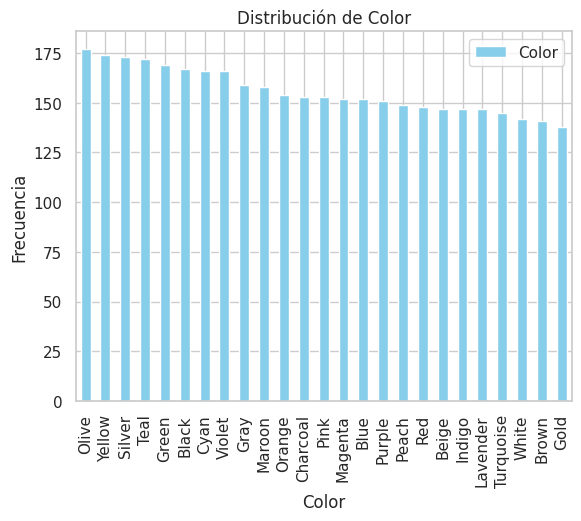

__________________________________________________
Season : 

        Season
Summer     955
Winter     971
Fall       975
Spring     999


<Figure size 1000x600 with 0 Axes>

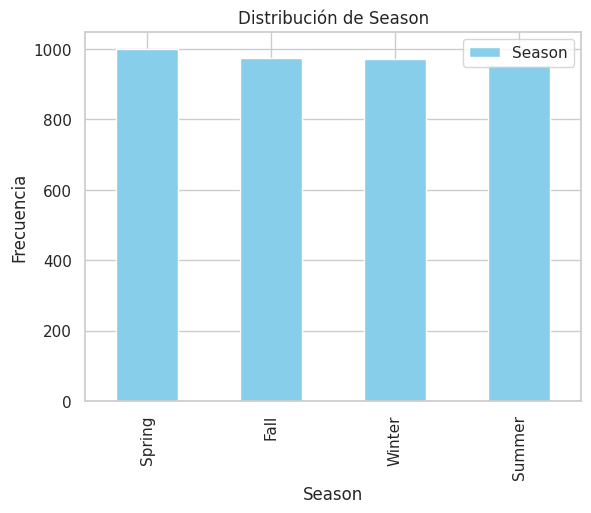

__________________________________________________
Subscription Status : 

     Subscription Status
Yes                 1053
No                  2847


<Figure size 1000x600 with 0 Axes>

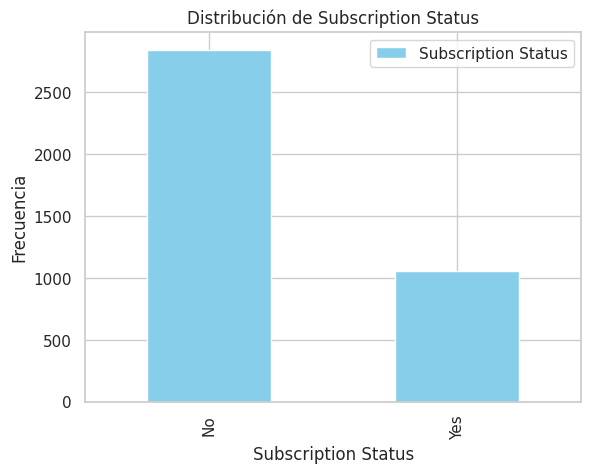

__________________________________________________
Payment Method : 

               Payment Method
Bank Transfer             632
Debit Card                633
PayPal                    638
Cash                      648
Venmo                     653
Credit Card               696


<Figure size 1000x600 with 0 Axes>

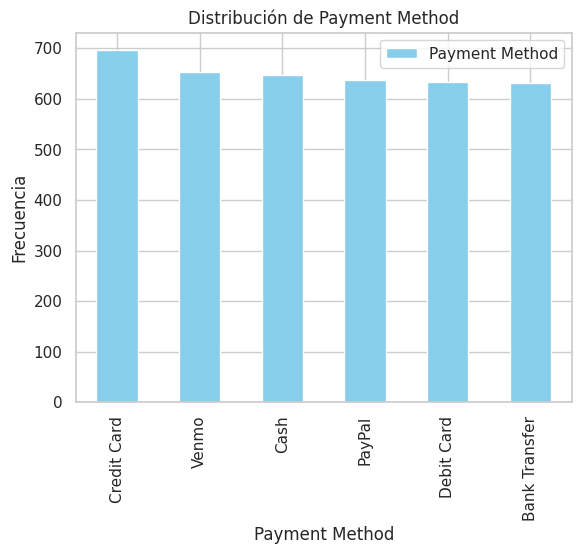

__________________________________________________
Shipping Type : 

                Shipping Type
2-Day Shipping            627
Express                   646
Next Day Air              648
Store Pickup              650
Standard                  654
Free Shipping             675


<Figure size 1000x600 with 0 Axes>

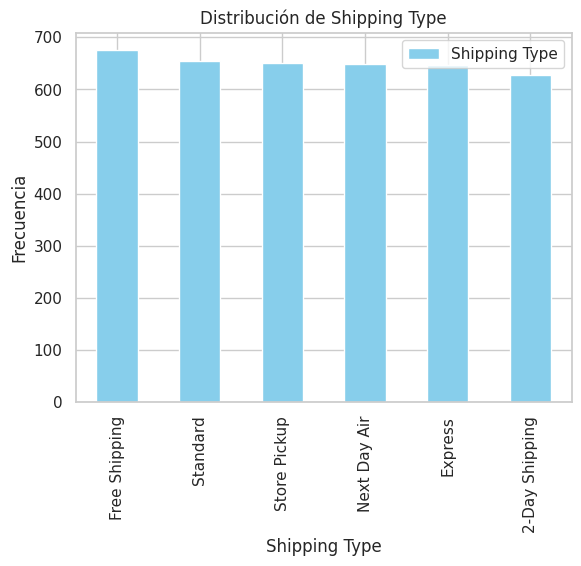

__________________________________________________
Promo Code Used : 

     Promo Code Used
Yes             1677
No              2223


<Figure size 1000x600 with 0 Axes>

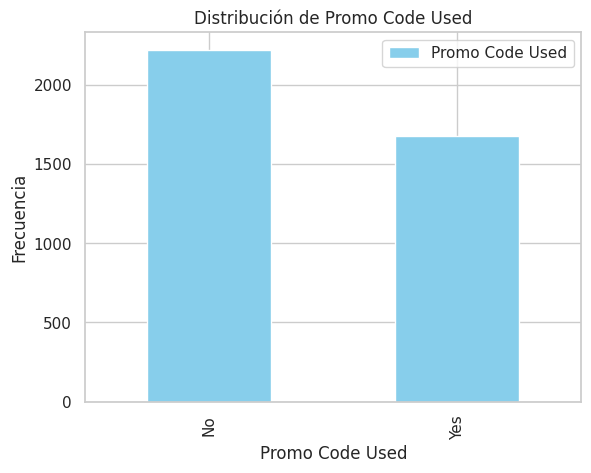

__________________________________________________
Frequency of Purchases : 

                Frequency of Purchases
Weekly                             539
Fortnightly                        542
Bi-Weekly                          547
Monthly                            553
Quarterly                          563
Annually                           572
Every 3 Months                     584


<Figure size 1000x600 with 0 Axes>

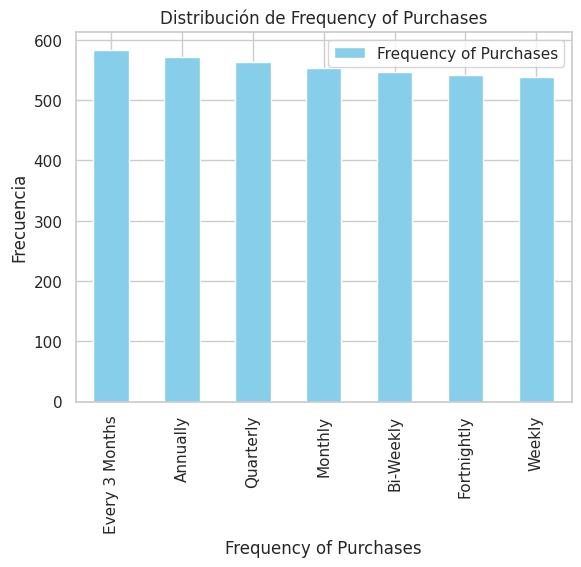

__________________________________________________


In [ ]:
# @title
columnas_interes = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season',
       'Subscription Status', 'Payment Method', 'Shipping Type', 'Promo Code Used',
       'Frequency of Purchases']

for columna in columnas_interes:
  print(columna, ": \n")
  valores = pd.DataFrame(df.loc[:, columna].value_counts())
  print(valores.sort_values(by = columna, ascending = True))

  # Crear gráfico de barras
  plt.figure(figsize=(10, 6))
  valores.plot(kind='bar', color='skyblue')
  plt.title(f'Distribución de {columna}')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.show()

  print(50*"_")


Observaciones

---

*   La cantidad de hombres supera ampliamente a las mujeres que compran en esta tienda, eso puede sugerir que el local comercializa ropa y accesorios masculinos.

*   Es un local donde predomina la venta de ropa ante los accesorios o zapatillas.

*   Como es de esperar, el talle M es el más vendido, seguido por el L; esto se debe a que la mayoría de la población utiliza estos talles.

*  Con respecto a los colores, si bien algunos se venden más que otros, no hay una marcada diferencia entre alguno que se venda excesivamente mucho y otro casi nulo.

*   En todas las estaciones del año se comercializa relativamente igual, lo que indica que la marca de ropa es multiestacional, es decir, no vende, por ejemplo, solo ropa de invierno (sky) o solo de verano (mallas). Tampoco se visualiza una estación en la que se deba realizar más ofertas para intentar normalizarlas con las otras porque ya se encuentran así.

*   La mayoría de la gente no se encuentra suscrita al local. Se podría implementar un tipo de beneficio con la suscripción del mismo.

*   En los medios de pago, las frecuencias son similares. Se puede analizar que, si se contemplan las cantidades de efectivo, tarjeta de débito y transferencia, predomina el pago inmediato antes del crédito.a

* El tipo de entrega se encuentra similar en todos los tipos.

* Son más las personas que no usan un código de promoción que las que sí.

* La frecuencia de compra, si bien es similar en las cantidades en las diferentes categorías, al unificarlas en compra mensual o más de un mes, se puede observar que las personas compran con frecuencia menor a un mes.

### Satisfacción de cliente

Al finalizar la compra, a los clientes se les solicita una valoración de su satisfacción. La encuesta permite puntuar con valores entre 1 y 5, siendo 1 totalmente insatisfecho y 5 totalmente satisfecho.

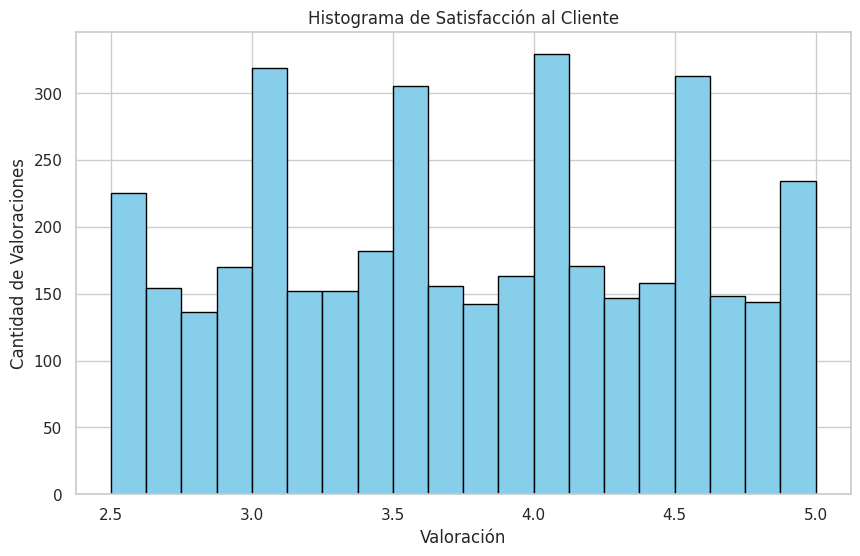

In [ ]:
# @title
plt.figure(figsize=(10,6))
plt.hist(df['Review Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Satisfacción al Cliente')
plt.xlabel('Valoración')
plt.ylabel('Cantidad de Valoraciones')
plt.show()


Conclusión:

---

Se puede visualizar que **no hay una tendencia marcada** en cierta valoración, los valores se encuentran bastante dispersos entre el 2,5 y 5 puntos.

Si se puede notar que los usuarios tienden a calificar su satisfacción con números redondos.

Se busca conocer si las personas dan una mayor valoración ante un descuento

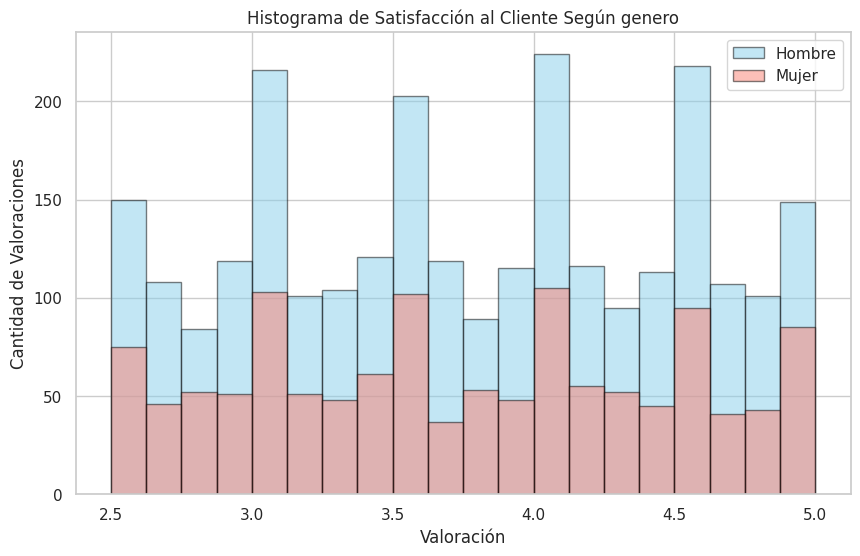

In [ ]:
# @title
# Filtrar el DataFrame para obtener dos conjuntos de datos
Hombre = df[df['Gender'] == 'Male']
Mujer = df[df['Gender'] == 'Female']

# Crear el histograma para las personas que usaron descuentos
plt.figure(figsize=(10, 6))
plt.hist(Hombre['Review Rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Hombre')

# Crear el histograma para las personas que no usaron descuentos
plt.hist(Mujer['Review Rating'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Mujer')

# Agregar etiquetas y título al gráfico
plt.title('Histograma de Satisfacción al Cliente Según genero')
plt.xlabel('Valoración')
plt.ylabel('Cantidad de Valoraciones')
plt.legend()
plt.show()

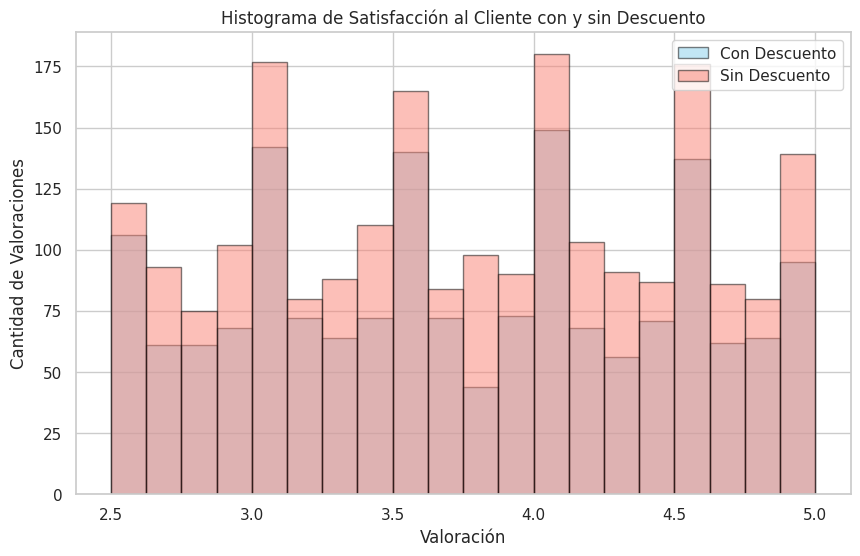

In [ ]:
# @title
# Filtrar el DataFrame para obtener dos conjuntos de datos
con_descuento = df[df['Discount Applied'] == 'Yes']
sin_descuento = df[df['Discount Applied'] == 'No']

# Crear el histograma para las personas que usaron descuentos
plt.figure(figsize=(10, 6))
plt.hist(con_descuento['Review Rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Con Descuento')

# Crear el histograma para las personas que no usaron descuentos
plt.hist(sin_descuento['Review Rating'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Sin Descuento')

# Agregar etiquetas y título al gráfico
plt.title('Histograma de Satisfacción al Cliente con y sin Descuento')
plt.xlabel('Valoración')
plt.ylabel('Cantidad de Valoraciones')
plt.legend()
plt.show()

Conclusión

---

No se encuentra relación entre el descuento y la valoración

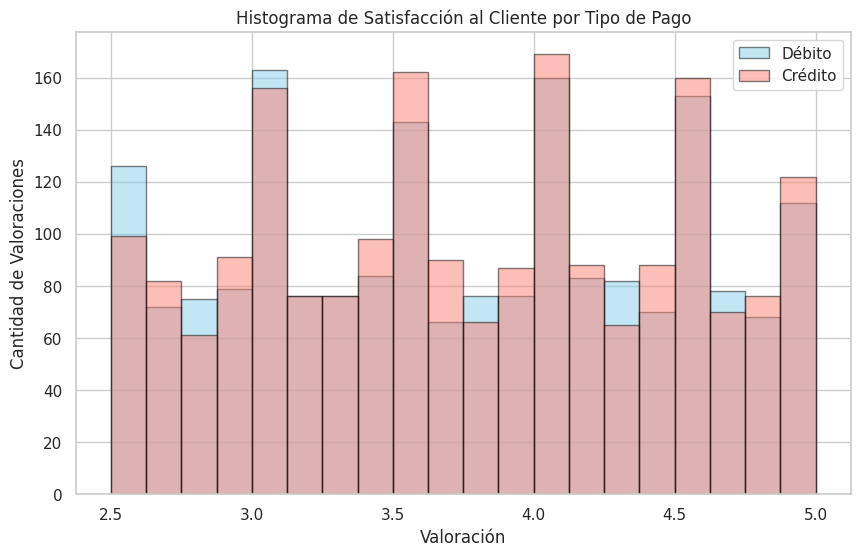

In [ ]:
# @title
# Crear una nueva columna 'Tipo de Pago' basada en las condiciones
df['Tipo de Pago'] = df['Preferred Payment Method'].apply(lambda x: 'Débito' if x in ['Cash', 'Debit Card', 'Bank Transfer'] else 'Crédito')

# Filtrar el DataFrame para obtener los conjuntos de datos por tipo de pago
debito = df[df['Tipo de Pago'] == 'Débito']
credito = df[df['Tipo de Pago'] == 'Crédito']

# Crear el histograma para cada tipo de pago
plt.figure(figsize=(10, 6))
plt.hist(debito['Review Rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Débito')
plt.hist(credito['Review Rating'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Crédito')

# Agregar etiquetas y título al gráfico
plt.title('Histograma de Satisfacción al Cliente por Tipo de Pago')
plt.xlabel('Valoración')
plt.ylabel('Cantidad de Valoraciones')
plt.legend()
plt.show()

Se busca ver si hay alguna tendencia de valoración según el metodo de pago

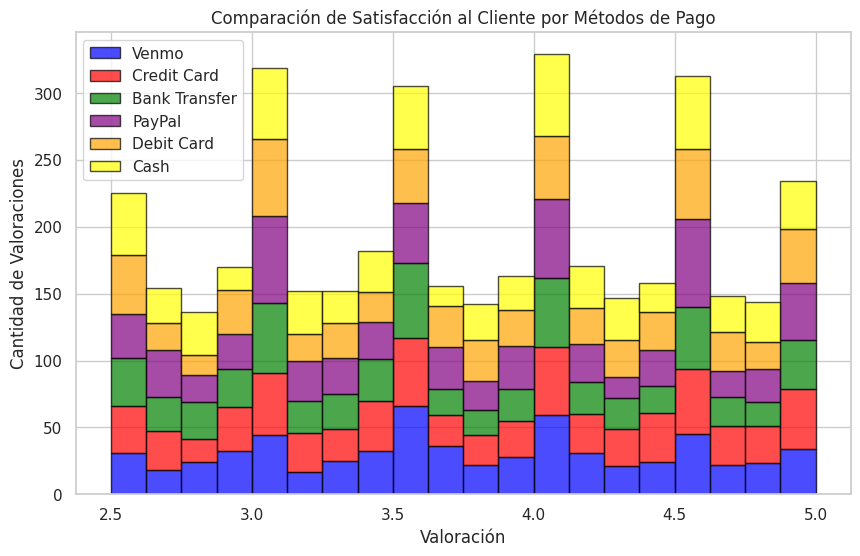

In [ ]:
# @title
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener los diferentes métodos de pago
venmo = df[df['Preferred Payment Method'] == 'Venmo']
credit_card = df[df['Preferred Payment Method'] == 'Credit Card']
bank_transfer = df[df['Preferred Payment Method'] == 'Bank Transfer']
paypal = df[df['Preferred Payment Method'] == 'PayPal']
debit_card = df[df['Preferred Payment Method'] == 'Debit Card']
cash = df[df['Preferred Payment Method'] == 'Cash']

# Crear el histograma con barras acumuladas para los diferentes métodos de pago
plt.figure(figsize=(10, 6))
plt.hist([venmo['Review Rating'], credit_card['Review Rating'], bank_transfer['Review Rating'],
          paypal['Review Rating'], debit_card['Review Rating'], cash['Review Rating']],
         bins=20, color=['blue', 'red', 'green', 'purple', 'orange', 'yellow'],
         edgecolor='black', alpha=0.7, label=['Venmo', 'Credit Card', 'Bank Transfer', 'PayPal', 'Debit Card', 'Cash'],
         stacked=True)

# Agregar etiquetas y título al gráfico
plt.title('Comparación de Satisfacción al Cliente por Métodos de Pago')
plt.xlabel('Valoración')
plt.ylabel('Cantidad de Valoraciones')
plt.legend()
plt.show()

### Articulos por categoria

<ipython-input-19-0ed693d06751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='pastel', ax=axes[0])


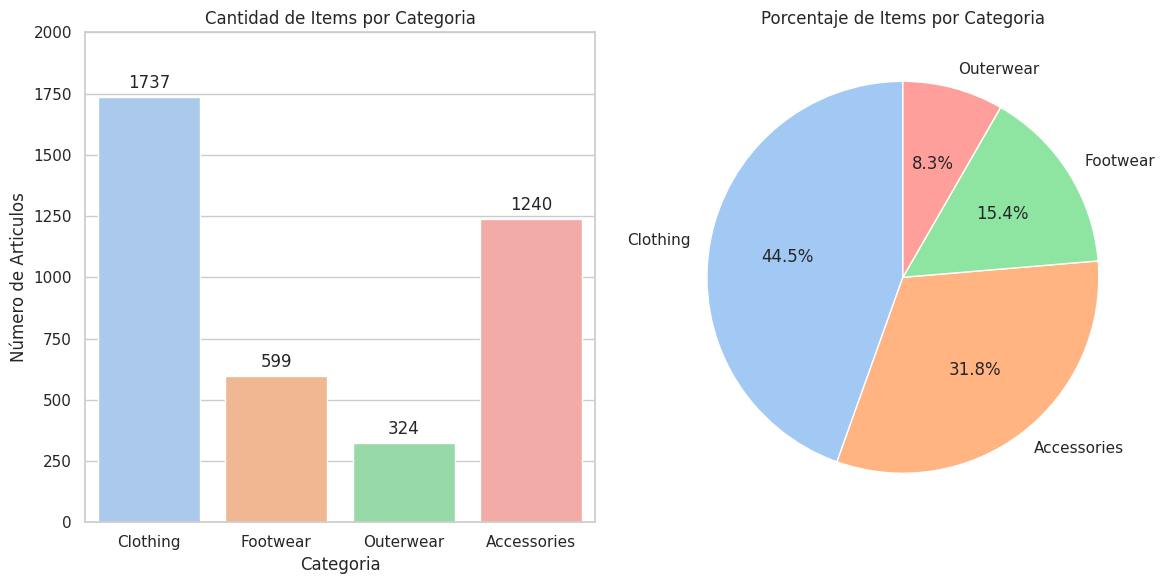

In [ ]:
# @title
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(x='Category', data=df, palette='pastel', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_title('Cantidad de Items por Categoria')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Número de Articulos')
axes[0].set_ylim(0, 2000)

# Gráfico de torta
categorias_porcentaje = df['Category'].value_counts(normalize=True) * 100
categorias_porcentaje.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), ax=axes[1])
axes[1].set_title('Porcentaje de Items por Categoria')
axes[1].set_ylabel('')
plt.tight_layout()

plt.show()

Conclusión:


---


Ho: ¿Algúna categoria comprendre más del 50% de las compras? - No


H0.2 ¿La suma de dos categorias comprendre más del 50% de las compras? - Si, el **76% de las compras son para ropa y accesorios**

Como se puede observar el fuerte del local es la ropa y complementa sus ventas con accesorios.

### Size vs Monto

Se busca conocer si el tamaño de la prenda tiene algun tipo de relación con el monto abonado por el cliente

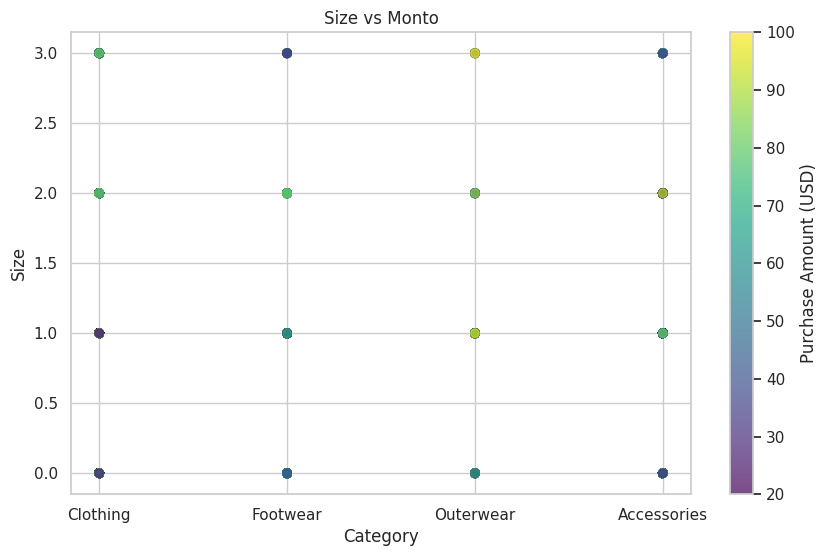

In [ ]:
# @title
import seaborn as sns

size_colors = {'S': 'red', 'M': 'green', 'L': 'blue'}
df['Size_Code'] = df['Size'].astype('category').cat.codes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Category'], df['Size_Code'], c=df['Purchase Amount (USD)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Purchase Amount (USD)')
plt.title('Size vs Monto')
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

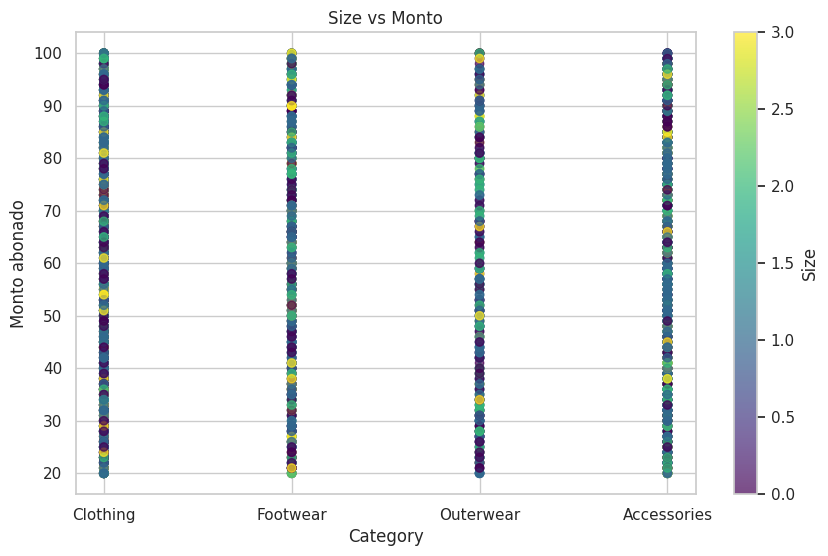

In [ ]:
# @title
import seaborn as sns

size_colors = {'S': 'red', 'M': 'green', 'L': 'blue'}
df['Size_Code'] = df['Size'].astype('category').cat.codes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Category'], df['Purchase Amount (USD)'], c=df['Size_Code'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Size')
plt.title('Size vs Monto')
plt.xlabel('Category')
plt.ylabel('Monto abonado')
plt.show()

Conclusión

---

h0: Hay una relación marcada de precio entre el talle y el tipo de accesorio?

En el primer grafico se puede visualizar que para ropa y ropa de calle es mas economico a menor talle. No asi en calzado y accesorios.

### Rating vs Monto

El gráfico mostrará si se encuentra una relación entre el precio que se paga y el puntaje de satisfacción que el cliente otorga.

<ipython-input-22-002ea290b0b8>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( df['Review Rating'],df['Purchase Amount (USD)'], cmap='viridis', alpha=0.7)


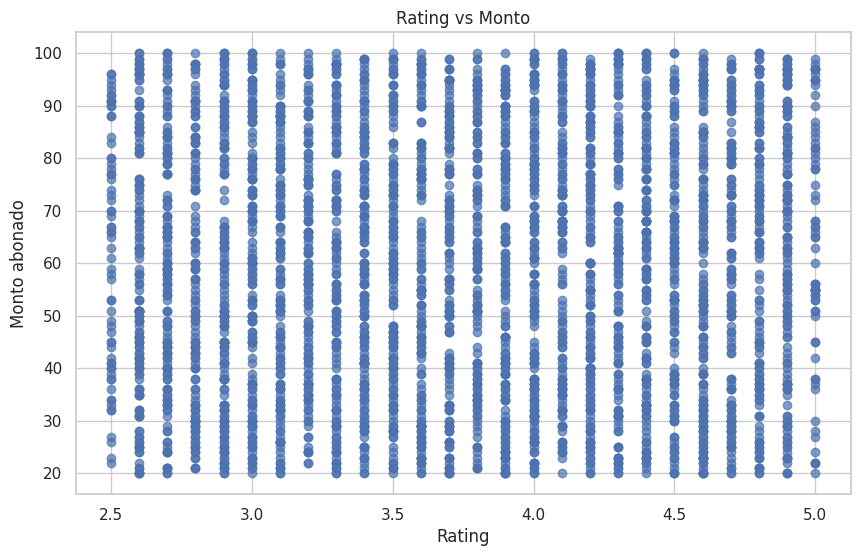

In [ ]:
# @title
plt.figure(figsize=(10, 6))
plt.scatter( df['Review Rating'],df['Purchase Amount (USD)'], cmap='viridis', alpha=0.7)
plt.title('Rating vs Monto')
plt.xlabel('Rating')
plt.ylabel('Monto abonado')
plt.show()

Conclusión

---

En este gráfico se intenta buscar la relación que existe entre el valor de la compra y el review que deja el usuario. Debido a la inconsistencia de los datos de Review, que toman valores categóricos, no se puede visualizar la densidad de puntos del scatter plot. Para solventar esto, se realizará un gráfico de distribución para cada valor posible de review, y se dispondrán todas las distribuciones una al lado de la otra en un mismo gráfico.

<ipython-input-23-e4ba865bfefb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Review Rating', y='Purchase Amount (USD)', data=df, palette='viridis')
<ipython-input-23-e4ba865bfefb>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Review Rating', y='Purchase Amount (USD)', data=df.groupby('Review Rating').mean().reset_index(), color='red', markers='D', linestyles='dashed')


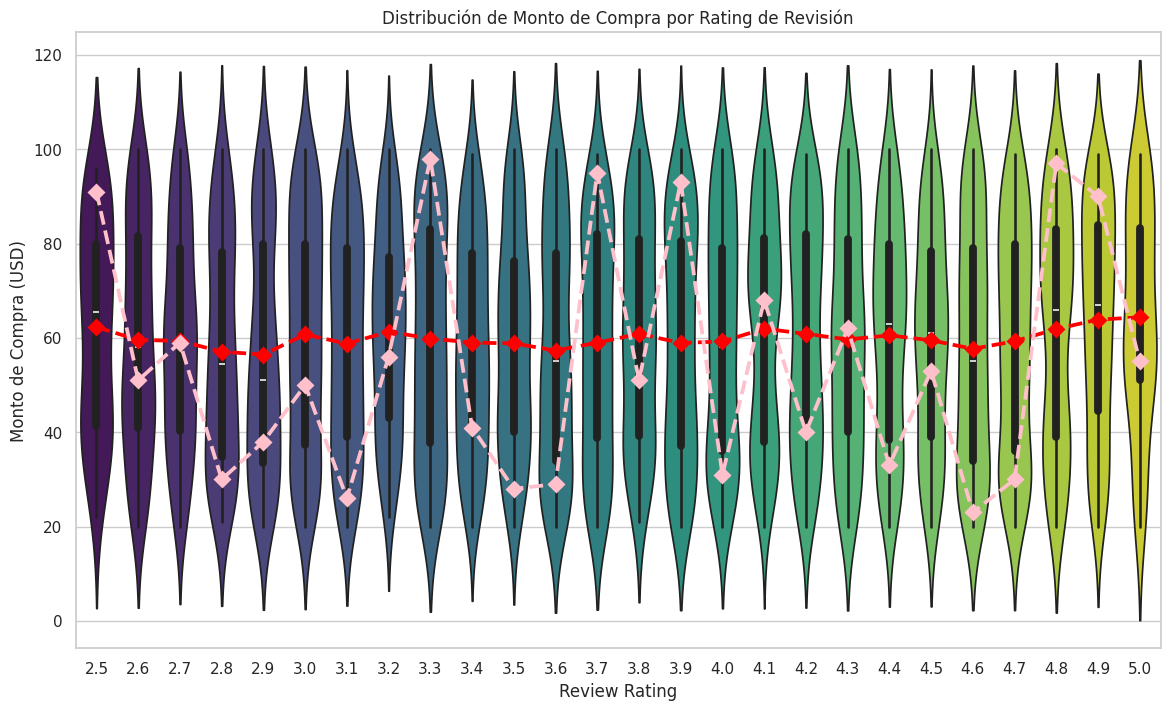

In [ ]:
# @title
plt.figure(figsize=(14, 8))

# Violin plot
sns.violinplot(x='Review Rating', y='Purchase Amount (USD)', data=df, palette='viridis')

# Punto para la línea de conexión
sns.pointplot(x='Review Rating', y='Purchase Amount (USD)', data=df.groupby('Review Rating').mean().reset_index(), color='red', markers='D', linestyles='dashed')
moda_values = df.groupby('Review Rating')['Purchase Amount (USD)'].apply(lambda x: x.mode().iloc[0]).reset_index()
sns.pointplot(x='Review Rating', y='Purchase Amount (USD)', data=moda_values, color='pink', markers='D', linestyles='dashed')

plt.title('Distribución de Monto de Compra por Rating de Revisión')
plt.xlabel('Review Rating')
plt.ylabel('Monto de Compra (USD)')

plt.show()

Conclusión:

---
En el gráfico se muestra el monto pagado vs el número de review otorgado, se marca con rojo la media y con rosa la moda.

**No** se encuentra relación **entre el monto abonado y la valoración otorgada**

La media prevalece casi con un valor constante, sin marcar relevancia en algún monto o número particular.

Para la moda, ocurre algo similar, donde no hay varios puntos que destaquen o marquen una tendencia.

###Caificación vs Ubicación


Otro dato que se quiere analizar, es si hay o no relación entre la ubicación del local de venta y la calificación otorgada.

<ipython-input-24-3132b7539167>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Review Rating'], df['Location'], s=df['Purchase Amount (USD)'], cmap='viridis', alpha=0.7)


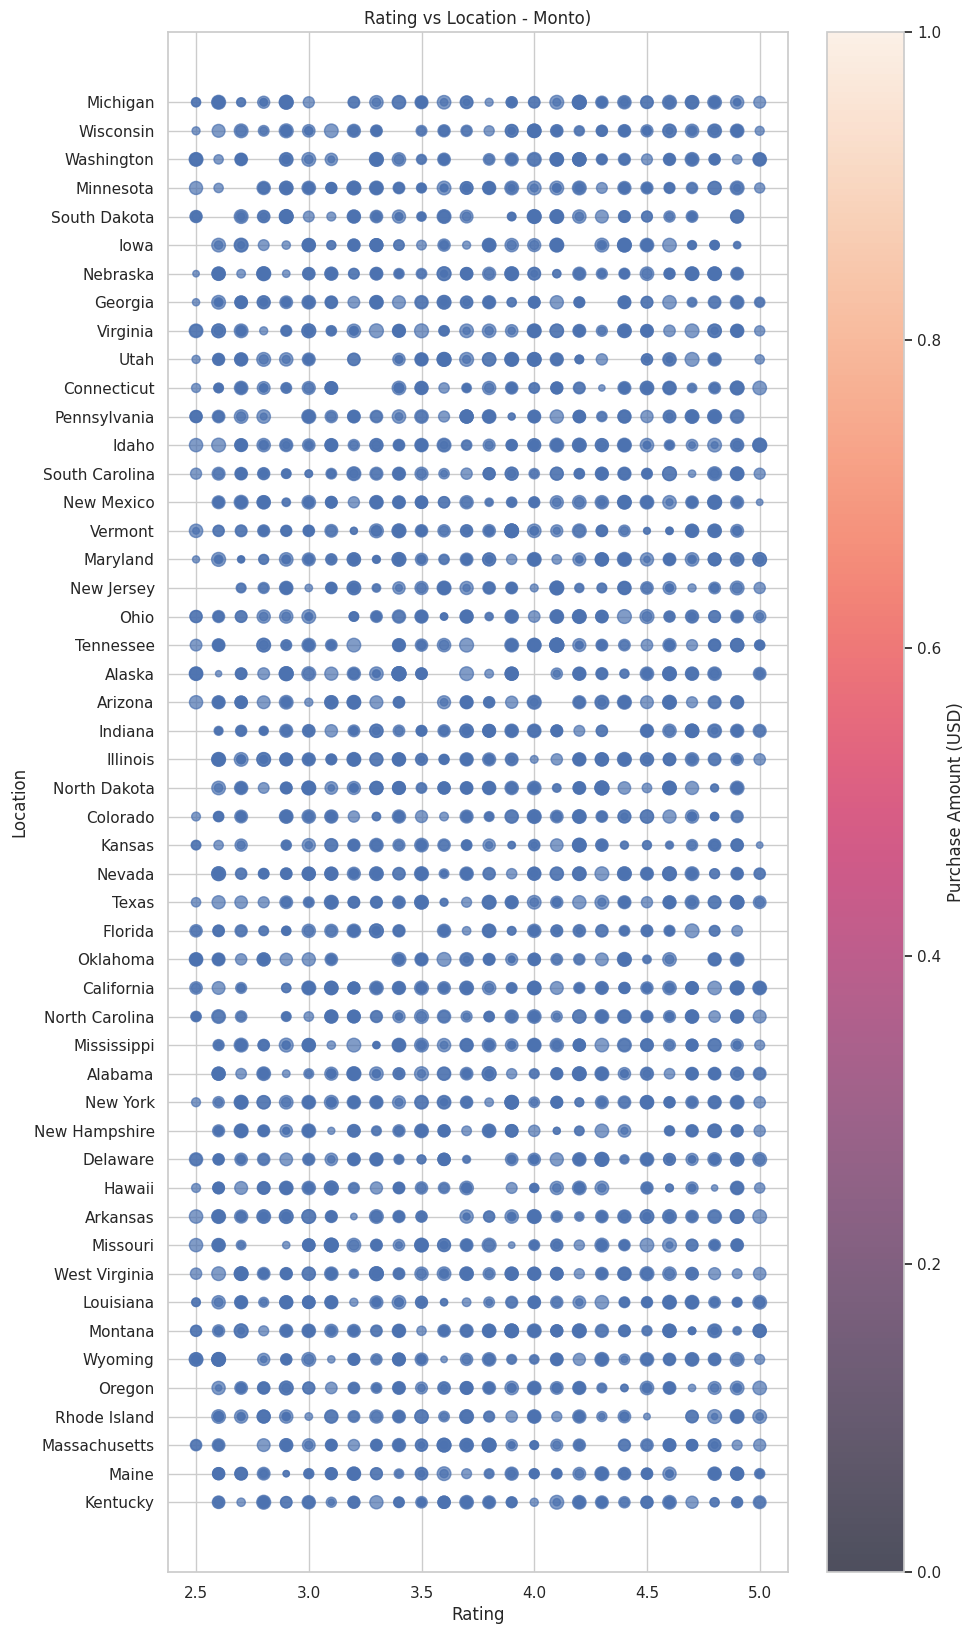

In [ ]:
# @title
plt.figure(figsize=(10, 20))
plt.scatter(df['Review Rating'], df['Location'], s=df['Purchase Amount (USD)'], cmap='viridis', alpha=0.7)
plt.title('Rating vs Location - Monto)')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.colorbar(label='Purchase Amount (USD)')

plt.show()

Conclusión

---

No se encuentra una relación entre locación, monto y rating.
Por lo que supone que tanto precios, articulos , modalidad de atención y disposición del local son similares en todos los casos.

### Frecuencia de Compras vs Tipo de Pago

Se intenta descubrir una conexión entre la frecuencia de compra de los clientes con el medio de pago que utilizan

Text(0.5, 1.0, 'Frecuencia de Compras por metodo de pago')

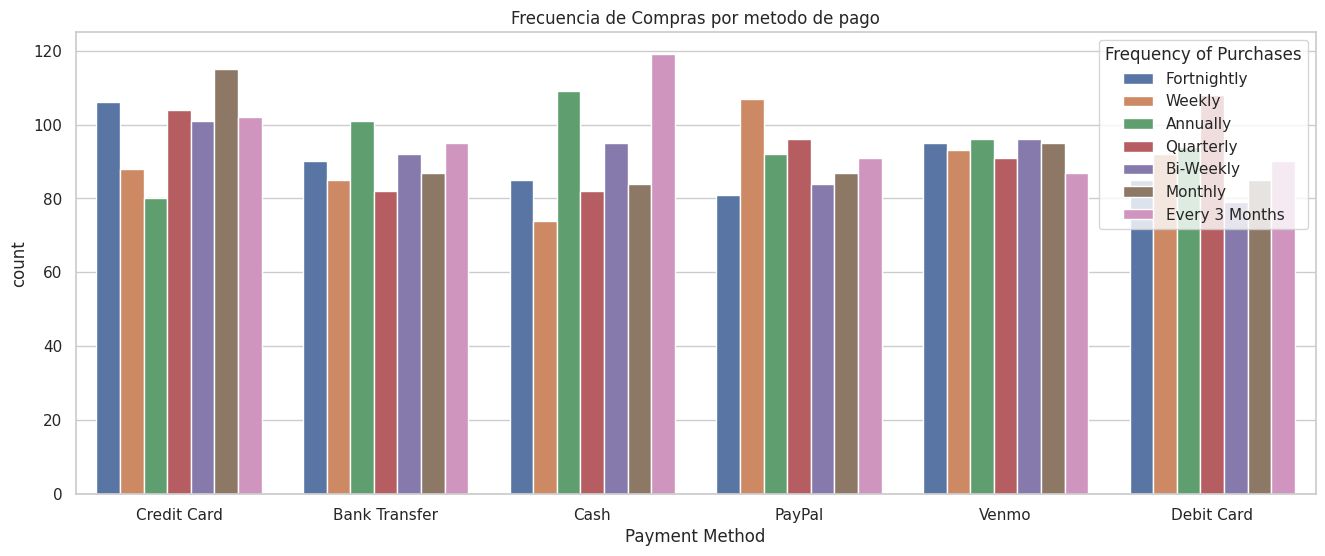

In [ ]:
# @title
plt.figure(figsize=(16, 6))
sns.countplot(x='Payment Method', data=df, hue='Frequency of Purchases')
plt.title('Frecuencia de Compras por metodo de pago')

Conclusión

---

La gente que paga con efectivo compra cada periodos mas grandes, es decir compra menos veces.<br>
Los que compran una vez por mes suelen pagar con tarjeta.<br>
No hay gran diferencia con el resto de pagos.



### Disperción de montos

Se analiza la vinculación entre el monto pagado y el genero, tipo de articulo y talle.

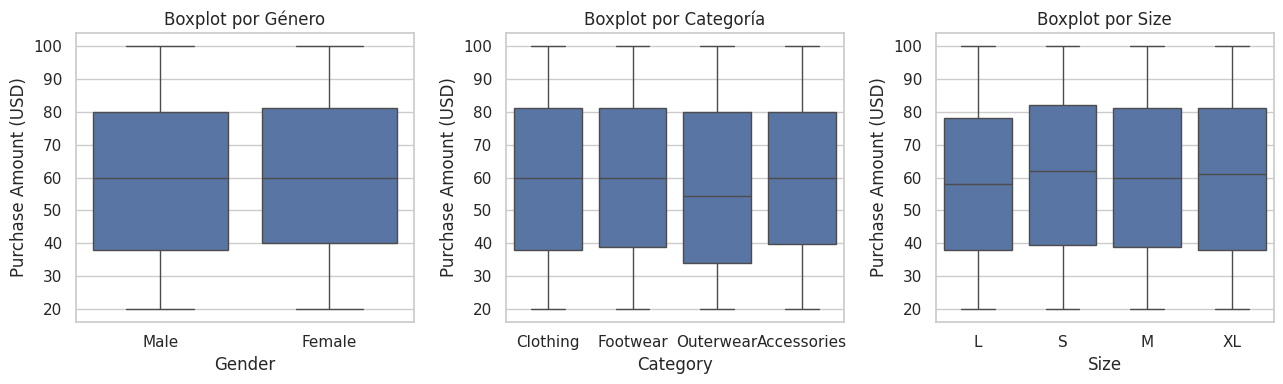

In [ ]:
# @title

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Primer gráfico
sns.boxplot(x="Gender", y="Purchase Amount (USD)", data=df, ax=axes[0])
axes[0].set_title('Boxplot por Género')

# Segundo gráfico
sns.boxplot(x="Category", y="Purchase Amount (USD)", data=df, ax=axes[1])
axes[1].set_title('Boxplot por Categoría')

# Tercer gráfico
sns.boxplot(x="Size", y="Purchase Amount (USD)", data=df, ax=axes[2])
axes[2].set_title('Boxplot por Size')

plt.tight_layout()
plt.show()


Conclusión

---

H0: Los rangos de montos difieren según sexo?
 No, los rangos de monto gastado entre ambos sexos son similares.


H0: Se encuentran montos muy diferentes según categoria? - Se puede visualizar que la mayoria de las categorias los montos rondan entre los 40 y 80 usd. Outwear contiene un poco mas de dispersión conteninedo montos cerca de los 35 usd.

H0: los montos se mantenienen según talle. Si, el talle no asocia altas o bajas en el monto

### Estado de Suscripción por Género

Se indaga sobre el genero de las suscripciones

Text(0.5, 1.0, 'Estado de Suscripción por Género')

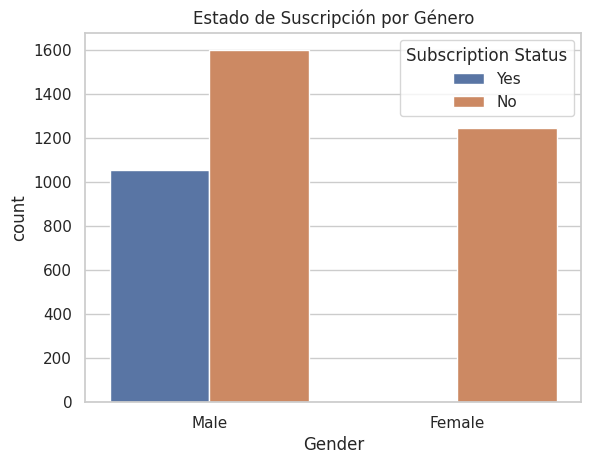

In [ ]:
# @title
sns.countplot(x='Gender', data=df, hue='Subscription Status')
plt.title('Estado de Suscripción por Género')

A continuación se muestra la cantidad exacta de suscripciones para cada genero

In [ ]:
# @title
pd.crosstab(index=df['Subscription Status'], columns=df['Gender'])
#.apply(lambda r: r/r.sum() *100, axis=1)

Gender               Female  Male
Subscription Status              
No                     1248  1599
Yes                       0  1053

Conclusión

---

H0: Hay igualdad de hombres y mujeres subscriptas.

No hay mujeres suscriptas, el **100% son hombres**

Esto se da a que el local es de ropa y accesorios masculinos

### Edad vs Rating por genero

Se examina la conexión entre edad del cliente y el valor de sastifacción brindado

Text(0.5, 1.0, 'Relación entre Edad y Calificación de Revisión')

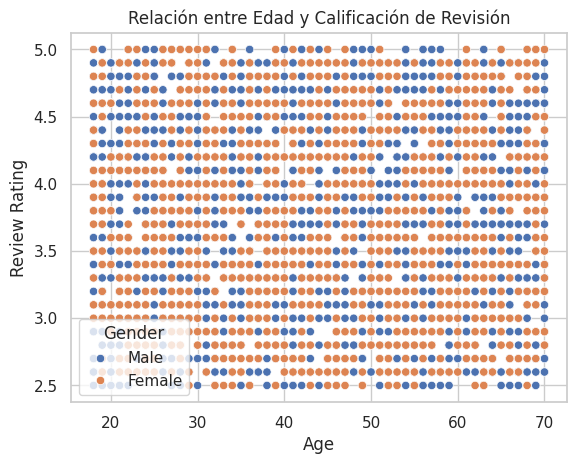

In [ ]:
# @title
sns.scatterplot(x='Age', y='Review Rating', data=df, hue='Gender')
plt.title('Relación entre Edad y Calificación de Revisión')

Conclusión

---

No se encuentra una relación marcada entre la edad y la valoración dada

### Distribución del Monto de Compra por Categoría:

Se busca determinar la distribución del monto de compra según la categoria del item comprado

<ipython-input-30-50addbf6e71b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x='Age', y='Purchase Amount (USD)', data=df.groupby('Age').mean().reset_index(), color='red', markers='D', linestyles='dashed')


Text(0.5, 1.0, 'Distribución del Monto de Compra por Categoría')

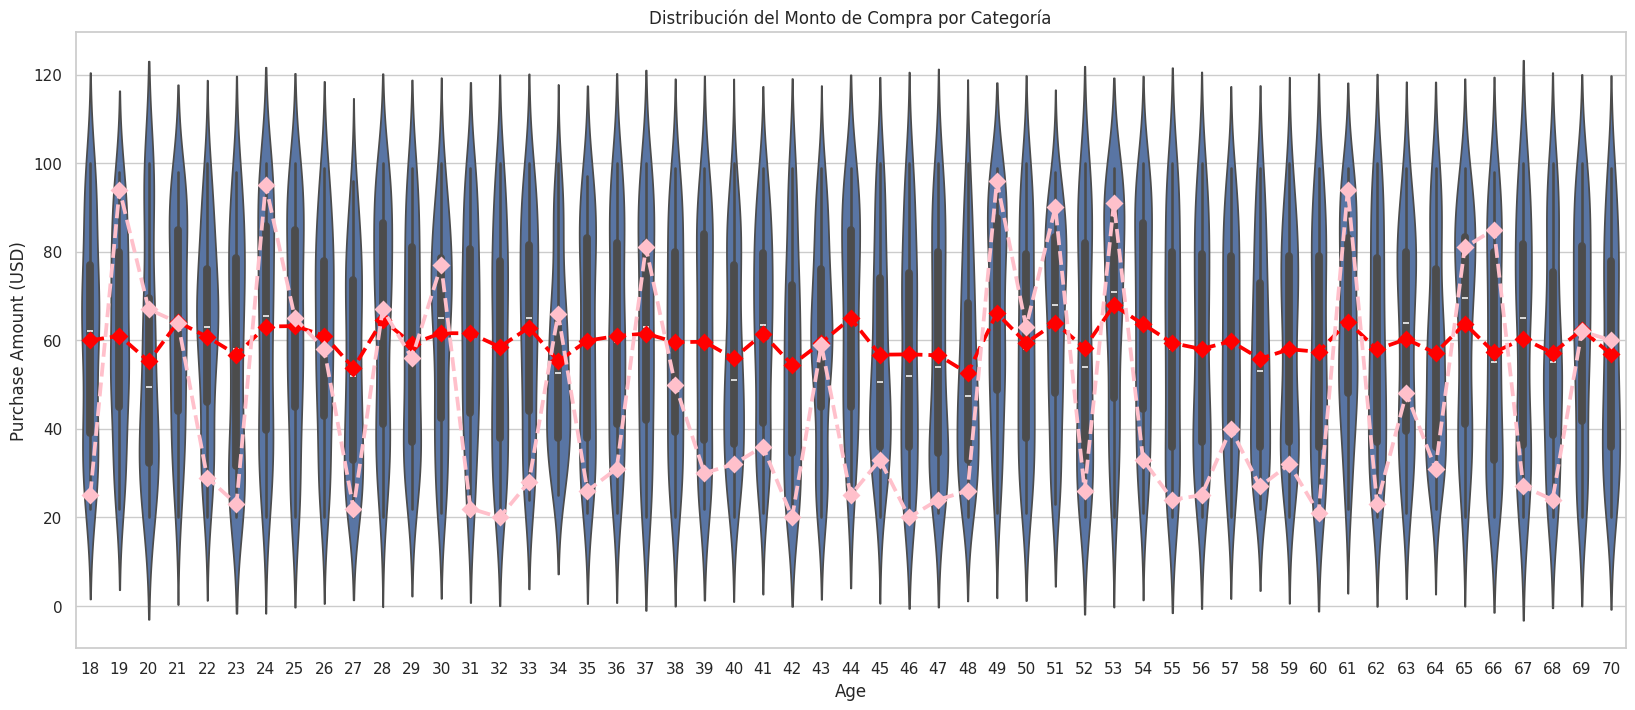

In [ ]:
# @title
plt.figure(figsize=(20, 8))
sns.violinplot(x='Age', y='Purchase Amount (USD)', data=df)

# Punto para la línea de conexión
sns.pointplot(x='Age', y='Purchase Amount (USD)', data=df.groupby('Age').mean().reset_index(), color='red', markers='D', linestyles='dashed')
moda_values = df.groupby('Age')['Purchase Amount (USD)'].apply(lambda x: x.mode().iloc[0]).reset_index()
sns.pointplot(x='Age', y='Purchase Amount (USD)', data=moda_values, color='pink', markers='D', linestyles='dashed')


plt.title('Distribución del Monto de Compra por Categoría')

Conclusión

---

Tendencia no marcada entre edad y dinero gastado

### Frecuencia de compras por suscripciones

Se busca determinar una relación entre la frencuencia de compras y la suscripción del cliente

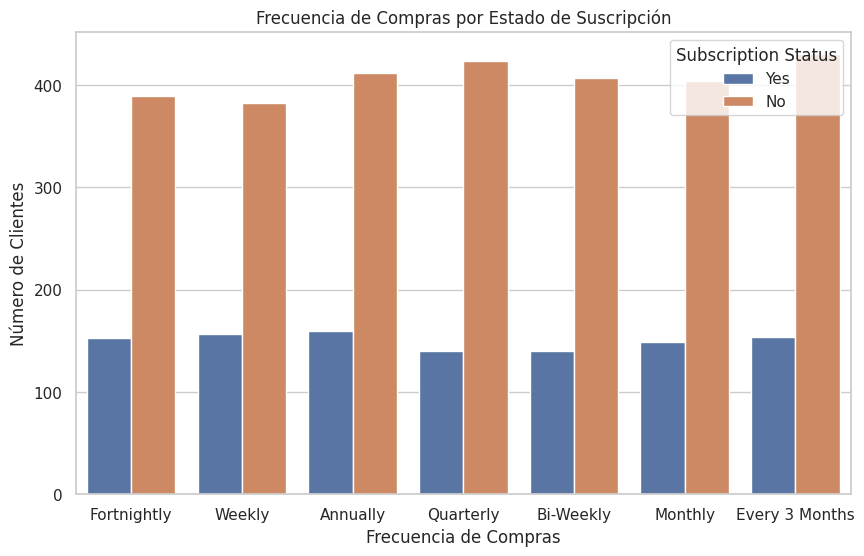

In [ ]:
# @title
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', hue='Subscription Status', data=df)
plt.title('Frecuencia de Compras por Estado de Suscripción')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Número de Clientes')
plt.show()

Conclusión

---

Se puede ver que la mayoria de las compras son realizadas por personas que no estan subscriptas.
Con respecto a la frecuencia, no depende de la suscripción.

### Compras de categoria por genero

Se indaga sobre las compras de items según categoria por genero. Se busca conocer si algún genero se inclina más que el otro por algún tipo de categoria.

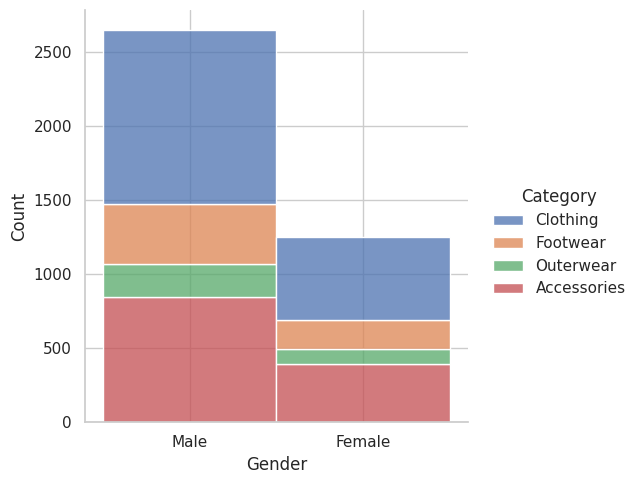

In [ ]:
# @title
# Figure-level
sns.displot(data=df, x="Gender", hue="Category", multiple="stack")

Conclusión

---

Si bien los % de compras son similares en los dos generos, el masculino supera ampliamente la cantidad de compras con respecto al genero femenino.
No se visualiza una tendencia de algun genero por alguna categoria. Las proporciones de compras son similares.

### Matriz de comparacion de variables continuas

En la siguiente matriz se visualiza las comparaciones de las variables continuas entre si y centrada en el raiting.

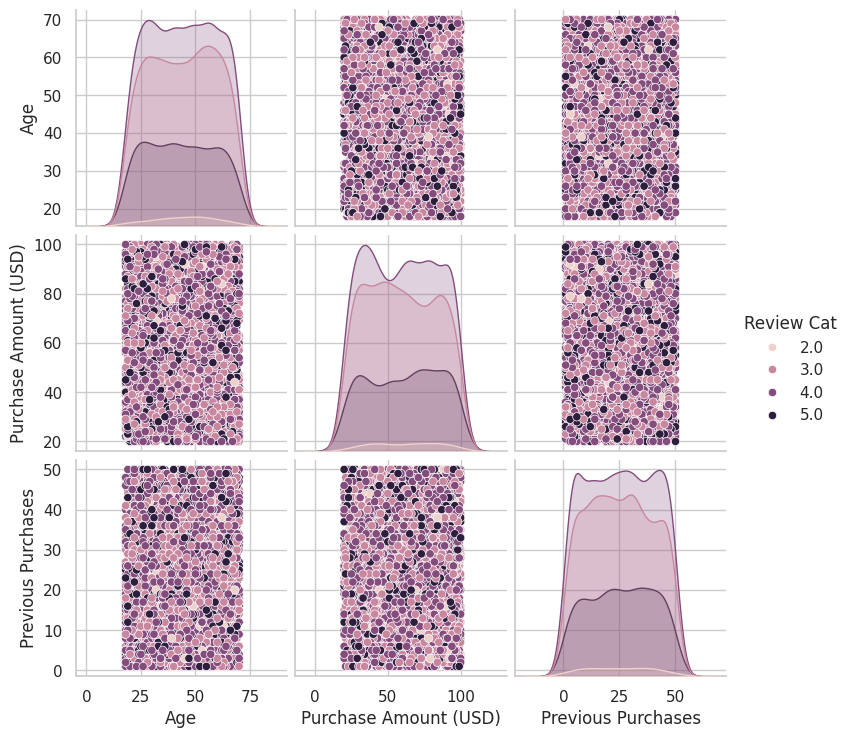

In [ ]:
# @title
columnas_numericas = ['Age', 'Purchase Amount (USD)',
                      'Previous Purchases']

# Categorizamos la variable de rating en 5 clases distintas.
review_cat = df.loc[:, "Review Rating"]
review_cat = np.round(review_cat, 0)

df_plot = df
df_plot["Review Cat"] = review_cat

sns.pairplot(df_plot, hue = 'Review Cat', vars = columnas_numericas)


 El grafico crea un conjunto de distintos gráficos de dispersión, scatter plots, que muestran las relaciones entre las columnas numéricas especificadas Age, Purchase Amount, Previous Purchases y utiliza el color para diferenciar las observaciones basadas en la variable categórica de reviews. Para la categorización de las reviews, se considero un redondeo de los decimales para solo contener 5 clases.

 El objetivo es buscar relaciones entre las variables númericas por ejemplo si hay alguna tendencia de rating, compras anteriores o montos de compra según edad.





Conclusión

---

Al comparar las variables continuas, no se pudo detectar ninguna relación marcada. Los valores se encuentran muy homogeneos.

# PREMODELOS

Para el modelado primero se decidio realizar un one hot encoded, el cual hará que se codifiquen las variables categóricas, convirtiendose en una nueva columna binaria.


In [ ]:
# @title
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Size_Code', 'Review Cat'],
      dtype='object')

In [ ]:
# @title
import copy

In [ ]:
df2 = copy.deepcopy(df)

In [ ]:
one_hot_encoded_train = pd.get_dummies(df2, columns = ['Gender', 'Item Purchased', 'Category',
       'Location', 'Size', 'Color', 'Season',
     'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
        'Preferred Payment Method',
       'Frequency of Purchases', 'Size_Code', 'Review Cat'])

In [ ]:
one_hot_encoded_train.columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases', 'Gender_Female', 'Gender_Male',
       'Item Purchased_Backpack', 'Item Purchased_Belt',
       'Item Purchased_Blouse',
       ...
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly',
       'Size_Code_0', 'Size_Code_1', 'Size_Code_2', 'Size_Code_3',
       'Review Cat_2.0', 'Review Cat_3.0', 'Review Cat_4.0', 'Review Cat_5.0'],
      dtype='object', length=158)

In [ ]:
train_to_model = one_hot_encoded_train.drop(['Customer ID'], axis = 1)

PCA - MCA

Se crearán dos DataFrames separados, train_PCA y train_MCA, para contener las variables continuas y categóricas, respectivamente

In [ ]:
columnas_continuas = ['Age', 'Purchase Amount (USD)', 'Review Rating']

In [ ]:
# @title
train_to_model.columns

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Gender_Female', 'Gender_Male', 'Item Purchased_Backpack',
       'Item Purchased_Belt', 'Item Purchased_Blouse', 'Item Purchased_Boots',
       ...
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly',
       'Size_Code_0', 'Size_Code_1', 'Size_Code_2', 'Size_Code_3',
       'Review Cat_2.0', 'Review Cat_3.0', 'Review Cat_4.0', 'Review Cat_5.0'],
      dtype='object', length=157)

In [ ]:
# @title
# Genero dos DF con los datos categoricos y numericos por separado. Tambien sale el resultado
train_PCA = train_to_model.loc[:, columnas_continuas].drop(['Review Rating'], axis = 1)
train_MCA = train_to_model.drop(columnas_continuas, axis = 1)

 Se instala la biblioteca Prince, que se utiliza para realizar el Análisis de Correspondencia Múltiple.

In [ ]:
!pip install prince
from prince import MCA

In [ ]:
# @title
# Inicializar y ajustar el modelo MCA
mca = MCA(
    n_components=len(train_MCA.columns),
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=False
)

mca.fit(train_MCA)

MCA(n_components=154, one_hot=False, random_state=42)

A partir de este momento nuestro dataset contiene 154 componentes prinicpales

In [ ]:
# @title
summaryMCA = pd.DataFrame(mca.eigenvalues_summary)
summaryMCA

summaryMCA['% of variance'] = summaryMCA['% of variance'].apply(lambda x: float(x.replace('%', '')))
summaryMCA['% of variance (cumulative)'] = summaryMCA['% of variance (cumulative)'].apply(lambda x: float(x.replace('%', '')))


Se calcula la varianza y su % para cada uno de los componentes y la varianza acumulada en % en la tercera columna.


In [ ]:
summaryMCA.head()

eigenvalue  % of variance  % of variance (cumulative)
component                                                      
0              0.103           2.61                        2.61
1              0.086           2.17                        4.78
2              0.060           1.53                        6.31
3              0.060           1.52                        7.83
4              0.059           1.49                        9.32

Con las desviaciones, se puede ver cuáles son las columnas que menos correlación tienen entre ellas. Ya que una gran varianza indica que la diferencia es grande y, por lo tanto, la correlación es baja. Esto indica que esas columnas deben dejarse en el modelo, ya que otorgan información distinta.

In [ ]:
# @title
column_coordinates = mca.column_coordinates(train_MCA)

# Mostrar las coordenadas de las columnas
column_coordinates.head()

0         1         2         3         4    \
Previous Purchases      -0.245137 -0.050844  0.006372  0.007066  0.000602   
Gender_Female            0.695798 -1.033816  0.000916  0.025741  0.008742   
Gender_Male              0.243761  0.604973 -0.015277 -0.028578 -0.005515   
Item Purchased_Backpack  0.537681  0.255440 -0.834639  0.608999  0.695713   
Item Purchased_Belt      0.468850  0.107765 -0.874277  0.838935  0.288998   

                              5         6         7         8         9    \
Previous Purchases       0.000673 -0.000922 -0.005451  0.001263  0.003115   
Gender_Female            0.008256 -0.017906  0.060516  0.060595  0.004156   
Gender_Male             -0.005452  0.010574 -0.015776 -0.031458 -0.009213   
Item Purchased_Backpack -0.119667  0.239551  1.287722  0.764554 -0.955540   
Item Purchased_Belt      0.119110  0.178545  1.068810  0.314989  0.140602   

                         ...      143       144       145       146       147  \
Previous Purchases       ... -0.00049  0.018132  0.004315  0.022582 -0.010851   
Gender_Female            ... -0.00049  0.018132  0.004315  0.022582 -0.010851   
Gender_Male              ... -0.00049  0.018132  0.004315  0.022582 -0.010851   
Item Purchased_Backpack  ... -0.00049  0.018132  0.004315  0.022582 -0.010851   
Item Purchased_Belt      ... -0.00049  0.018132  0.004315  0.022582 -0.010851   

                              148       149       150      151       152  
Previous Purchases      -0.000675 -0.007738 -0.001887  0.01521  0.031894  
Gender_Female           -0.000675 -0.007738 -0.001887  0.01521  0.031894  
Gender_Male             -0.000675 -0.007738 -0.001887  0.01521  0.031894  
Item Purchased_Backpack -0.000675 -0.007738 -0.001887  0.01521  0.031894  
Item Purchased_Belt     -0.000675 -0.007738 -0.001887  0.01521  0.031894  

[5 rows x 153 columns]

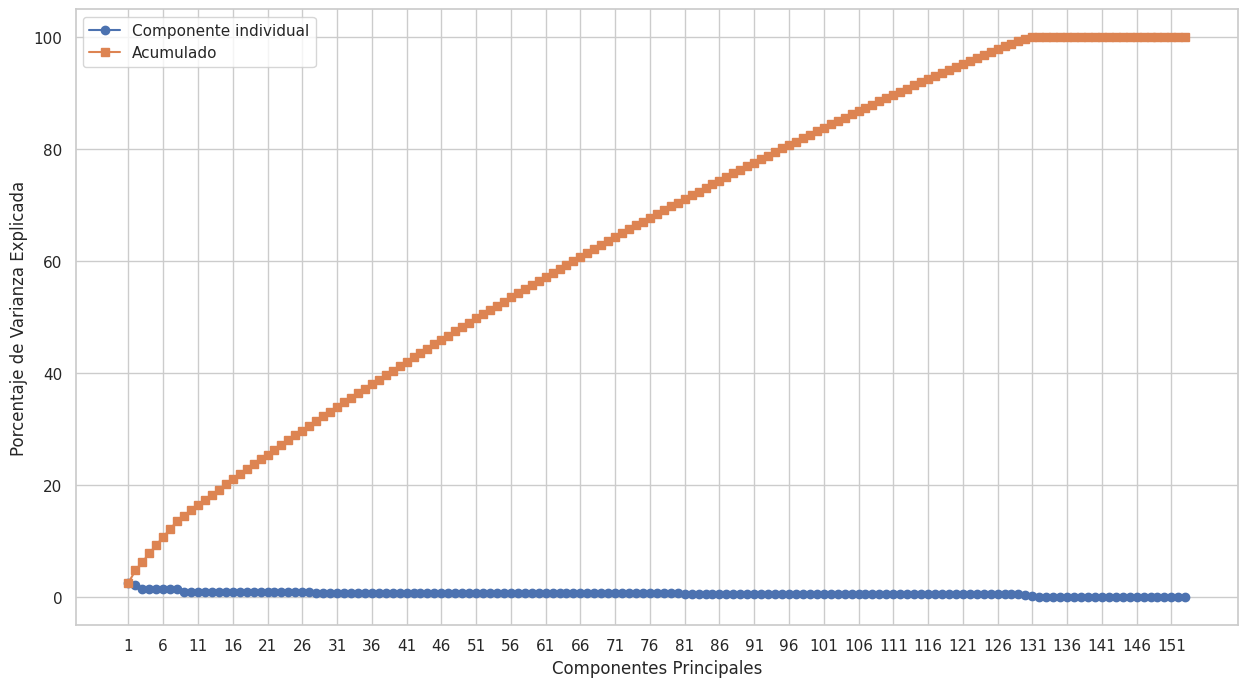

In [ ]:
# @title
plt.figure(figsize=(15, 8))

plt.plot(range(1, len(summaryMCA) + 1), summaryMCA.loc[:, '% of variance'], '-o', label='Componente individual')
plt.plot(range(1, len(summaryMCA) + 1), summaryMCA.loc[:, '% of variance (cumulative)'], '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xticks(range(1, len(summaryMCA) + 1, 5))
plt.legend(loc=2)

plt.show()

En el grafico se pueden visualizar las % de varianzas individuales de cada componente principal y los acumulados.
De este grafico se puede analizar que:
*   A partir de la columna 131 ya llegamos al acuulado de casi el 100%, por lo que las columnas posteriores a esa son realmente muy correlacionadas
*   A partir de la columna 80 aproximadamente se puede observar que el % acumulado es del 70.
*   Las varianzas en general son bajas.

Es por ello, que se decidio utilizar 80 columnas, representando el 70% de la varianza para continuar el ánalisis, disminuyedo la cantidad de componentes principales casi a la mitad.



In [ ]:
mca = MCA(n_components=80)
mca.fit(train_MCA)

MCA(n_components=80)

Se demuestra el recorte de columnas, que ahora son 80.

In [ ]:
MCA_proyectado = mca.transform(train_MCA)

In [ ]:
MCA_proyectado.shape

(3900, 80)

In [ ]:
# @title
MCA_proyectado.head()

0         1         2         3         4         5         6   \
0  0.253923 -0.171930 -0.153647 -0.047635 -0.000211 -0.105554  0.011318   
1  0.261441 -0.176615 -0.208653 -0.045632  0.002122 -0.052848 -0.022282   
2  0.279365 -0.121528 -0.043476  0.274735 -0.151676  0.032791 -0.060878   
3  0.251487  0.190787 -0.013434 -0.098314 -0.048101  0.254632 -0.108009   
4  0.246606  0.152859 -0.169327  0.073955  0.005354 -0.019376 -0.012673   

         7         8         9   ...        70        71        72        73  \
0  0.044278  0.027095 -0.000380  ...  0.093115  0.095629 -0.154131 -0.037431   
1  0.059272  0.105827  0.132362  ...  0.052258  0.125672 -0.076715  0.036968   
2  0.134483  0.093833 -0.108901  ...  0.145336  0.126785 -0.065419  0.012507   
3 -0.092801  0.114207  0.039162  ... -0.033224  0.066503  0.149500 -0.046752   
4  0.147002  0.075692 -0.142898  ...  0.020373 -0.047903  0.106669 -0.164707   

         74        75        76        77        78        79  
0  0.036042 -0.049506  0.124309 -0.075791  0.103822  0.014199  
1 -0.031468 -0.007964 -0.006246  0.082236  0.109603 -0.023195  
2 -0.044716 -0.184326 -0.038691  0.009195 -0.077448 -0.019942  
3  0.014036  0.085484 -0.063081  0.164287  0.008139 -0.052901  
4 -0.062429  0.039502 -0.054270 -0.094284  0.019914  0.139417  

[5 rows x 80 columns]

Se conocen los 25 componentes principales y cual fue su varibles mas representativa y su varianza

In [ ]:
for i in range(0,25):
  print(column_coordinates[i].idxmax())

Location_Texas
Subscription Status_Yes
Item Purchased_Jacket
Size_S
Item Purchased_Jacket
Item Purchased_Sneakers
Size_XL
Item Purchased_Backpack
Location_Georgia
Location_Wisconsin
Location_Wyoming
Location_Kansas
Location_Texas
Item Purchased_Backpack
Review Cat_2.0
Item Purchased_Handbag
Color_Pink
Location_Washington
Color_Gold
Location_Maryland
Location_Oklahoma
Location_Virginia
Location_Colorado
Location_Texas
Location_North Dakota


In [ ]:
summaryMCA.loc[0:25, '% of variance']

component
0     2.61
1     2.17
2     1.53
3     1.52
4     1.49
5     1.46
6     1.43
7     1.40
8     0.96
9     0.95
10    0.94
11    0.93
12    0.92
13    0.92
14    0.91
15    0.91
16    0.90
17    0.89
18    0.88
19    0.88
20    0.87
21    0.87
22    0.86
23    0.86
24    0.86
25    0.85
Name: % of variance, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Se calcula la media y la varianza para las variables continuas, en este caso usaremos unicamente edad y monto de compra, ya que la otra variable continua es satisfacción de cliente y es la que vamos a predecir.

In [ ]:
# @title
print("Media de las variables: ")
print(train_PCA.mean(axis=0))

print('\n')

print("Varianza de las variables: ")
print(train_PCA.var(axis=0))

Media de las variables: 
Age                      44.068462
Purchase Amount (USD)    59.764359
dtype: float64


Varianza de las variables: 
Age                      231.270767
Purchase Amount (USD)    560.997806
dtype: float64


In [ ]:
std_sclr = StandardScaler()
train_PCA_std = pd.DataFrame(std_sclr.fit_transform(train_PCA), index=train_PCA.index, columns=train_PCA.columns)

Se estandarizan las variables para generar un mejor resultado según el requisito estadistico en el pca

In [ ]:
# @title
print("Media de las variables: ")
print(train_PCA_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(train_PCA_std.var(axis=0))

Media de las variables: 
Age                     -1.985876e-16
Purchase Amount (USD)   -1.166019e-16
dtype: float64


Varianza de las variables: 
Age                      1.000256
Purchase Amount (USD)    1.000256
dtype: float64


In [ ]:
pca_train_PCA = PCA()
pca_train_PCA.fit(train_PCA_std)

PCA()

Una vez estandarizada se comprueba la ortonormalidad

In [ ]:
pca_loadings = pd.DataFrame(pca_train_PCA.components_.T, index=train_PCA.columns, columns=['PC1', 'PC2'])
pca_loadings

PC1       PC2
Age                   -0.707107  0.707107
Purchase Amount (USD)  0.707107  0.707107

In [ ]:
pca_loadings.T.dot(pca_loadings)

PC1           PC2
PC1  1.000000e+00 -4.266422e-17
PC2 -4.266422e-17  1.000000e+00

Como se puede visualizar en la matriz superior se comprueba la ortonormalidad

Se visualizan los datos de la componente principal generados para maximizar la varianza

In [ ]:
train_PCA_pca = pd.DataFrame(pca_train_PCA.fit_transform(train_PCA_std), columns=['PC1', 'PC2'],\
                      index=train_PCA_std.index)
train_PCA_pca.head()

PC1       PC2
0 -0.710319  0.306379
1  1.292225 -1.039289
2  0.119355  0.671023
3  1.975526 -0.169977
4 -0.364721 -0.278083

Se calcula la media y la varianza para verificar que la media de cerca de 0 y la varianza 1

In [ ]:
# @title
print("Media de los CP: ")
print(train_PCA_pca.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de los CPs: ")
print(train_PCA_pca.var(axis=0))

Media de los CP: 
PC1    3.643809e-17
PC2    6.148928e-17
dtype: float64


Varianza de los CPs: 
PC1    1.010683
PC2    0.989830
dtype: float64


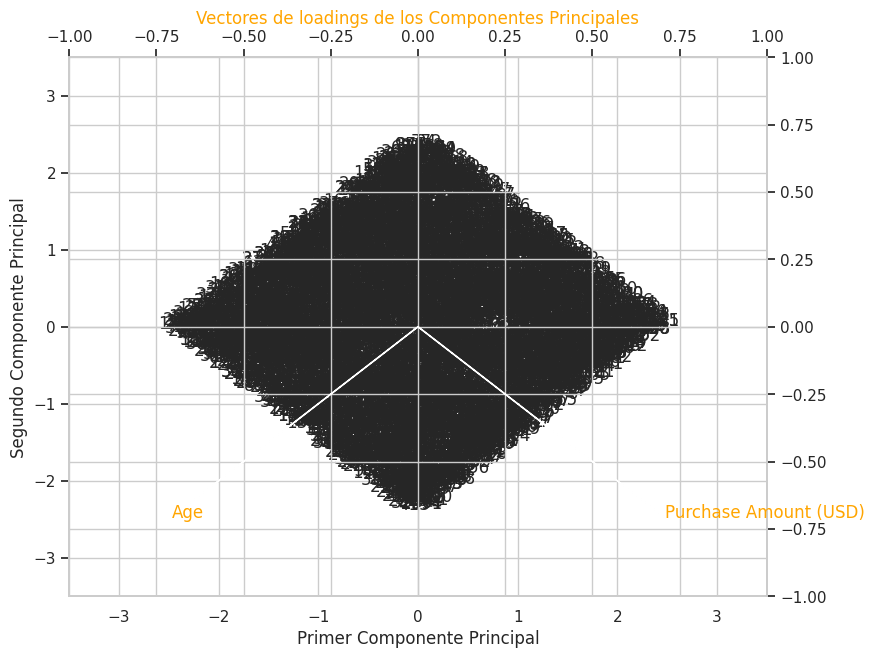

In [ ]:
# @title
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in train_PCA_pca.index:
    ax1.annotate(i, (train_PCA_pca.PC1.loc[i], -train_PCA_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia


ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')

# Creamos ejes secundarios
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], -pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])

Como se puede visualizar con la lineas blancas para los vectores de age y purchase amount, los vectores se encuentran ortonormales

In [ ]:
pca_train_PCA.explained_variance_

array([1.0106828 , 0.98983016])

In [ ]:
pca_train_PCA.explained_variance_ratio_

array([0.50521182, 0.49478818])

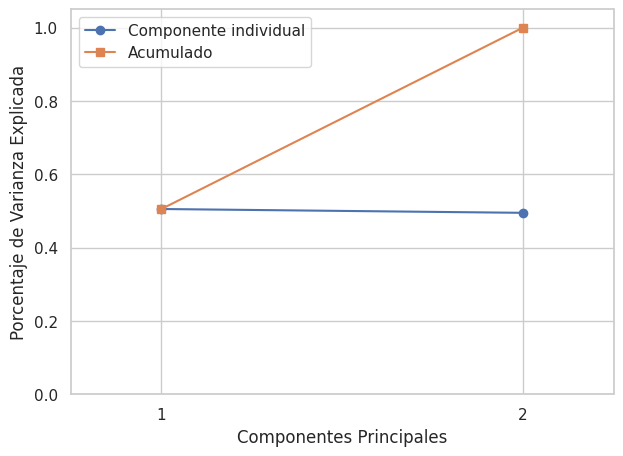

In [ ]:
# @title
plt.figure(figsize=(7,5))

plt.plot([1,2], pca_train_PCA.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2], np.cumsum(pca_train_PCA.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,2.25)
plt.ylim(0,1.05)
plt.xticks([1,2])
plt.legend(loc=2);

La suma del porcentaje de varianza da igual a 1, como se visualiza en la varianza acumulada.

Union PCA y MCA

In [ ]:
train_to_model = pd.concat([train_PCA, MCA_proyectado], axis=1)

In [ ]:
train_to_model = pd.concat([train_to_model, df2.loc[:, 'Review Rating']], axis=1)

# MODELOS

In [ ]:
from sklearn.model_selection import train_test_split

Quedamos solo con la columna a predecir en una variable y el resto de datos en otra, para poder comenzar con el modelado y posterior entrenamiento.

In [ ]:
# @title
data_y = train_to_model.loc[:, 'Review Rating']
data_x = train_to_model.drop('Review Rating', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [ ]:
# @title
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

Se comprueba que las variables contengan la información correcta

In [ ]:
# @title
print(X_train.columns)
print(y_train.shape)
print(len(X_train))
print(len(y_train))
print("_"*50)
print(X_test.columns)
print(y_test.shape)
print(len(X_test))
print(len(y_test))

Index([                  'Age', 'Purchase Amount (USD)',
                             0,                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                            10,                      11,
                            12,                      13,
                            14,                      15,
                            16,                      17,
                            18,                      19,
                            20,                      21,
                            22,                      23,
                            24,                      25,
                            26,                      27,
                            28,                      29,
                            30,                      31,
                            32,

### Prueba Inicial, con media y random

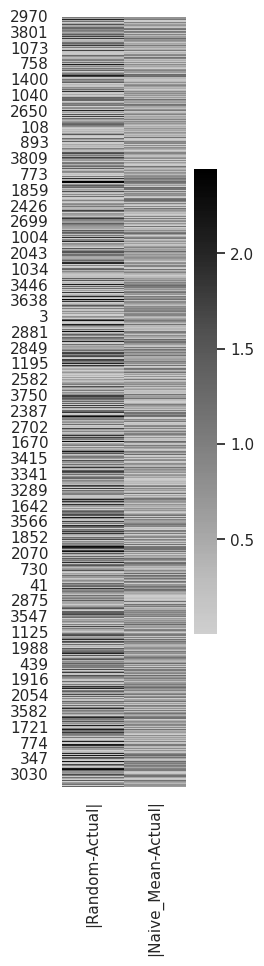

In [ ]:
# @title
result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

Conclusión

---

En el siguiente gráfico se ve la primera columna donde se compara contra valores randoms y en la segunda se compara contra la media.
La idea es verificar visualmente que la segunda columna deberia dar mejor que la primera. Donde se puede ver que la error obtiene valores mas chicos, es decir menos oscuros.

## Regresión lineal

Se probará como primer modelo la regresión lineal, por ser uno de los mas simples. Esperando un mejor resultado que la media y los randoms.

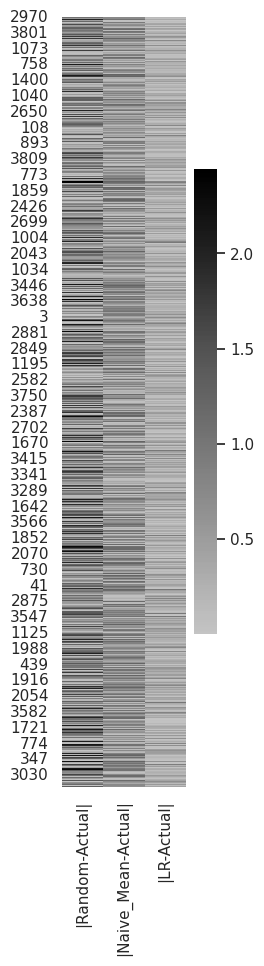

In [ ]:
# @title
#Method: LR
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

sales_lm = LinearRegression()
sales_lm.fit(X_train, y_train)
result_df.LR =sales_lm.predict(X_test)

result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

Conclusión

---
Como se puede observar, los valores de regresión lineal dan mejor que los de random y la media, es por eso que es mas clara la tercera columna.

Se observan los diferentes errores

In [ ]:
# @title
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

Random Naive_Mean        LR
ME    0.009286   0.006056  0.005497
RMSE   0.99887   0.712422  0.359661
MAE   0.807717   0.615562  0.291984
MAPE  22.54355    17.3065  8.136828

Conclusión

---

En la tabla anterior se comparan los errores entre valores random, la media y regresión lineal.
Como es de esperar el mayor error lo tiene el uso de valores random y el menor error la regresión lineal.
En el caso de LR se puede observar que los errores
RMSE (Error Cuadrático Medio), MAE (Error Absoluto Medio) y MAPE (Error Porcentual Absoluto Medio)  se encuentran por debajo de la mitad con respecto a las anteriores.

## MLP

En busqueda de un modelo que se adapte mejor se prueba con MLP

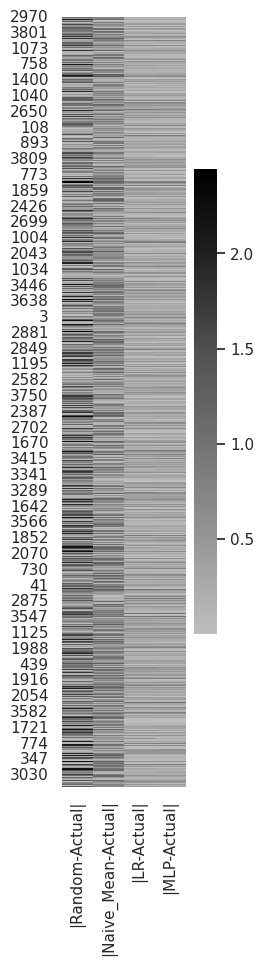

In [ ]:
# @title
sales_mlp = MLPRegressor(hidden_layer_sizes=10,max_iter=2000)
sales_mlp.fit(X_train, y_train)

result_df['MLP'] = sales_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

Conclusión

---

Graficamente se puede observar que los dos casos de regresión son mejores que el random y la media.
Además, se comparan nuevamente los errores entre los diferentes modelos

In [ ]:
# @title
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

Random Naive_Mean        LR       MLP
ME    0.009286   0.006056  0.005497 -0.018405
RMSE   0.99887   0.712422  0.359661  0.358357
MAE   0.807717   0.615562  0.291984  0.290092
MAPE  22.54355    17.3065  8.136828  8.136134

El error de LR es menor que MLP, lo que indica que la predicción de la regresión lineal es mejor


---


Se crea el tuning set
donde:
X_traine y_trainson los conjuntos de entrenamiento originales.
X_train_se y_train_sson los nuevos conjuntos de entrenamiento después de la división.
X_tunee y_tuneson los conjuntos de sintonización o validación.

El parámetro test_size=0.2indica que el 20% de los datos se utilizarán para el conjunto de sintonización, mientras que el 80% restante se mantendrá como el nuevo conjunto de entrenamiento. La opción random_state=1asegura que la división sea reproducible, es decir, si ejecutas el código varias veces con el mismo conjunto de datos, obtendrás la misma división.

In [ ]:
# @title
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)


X_train Shape:  (2730, 82)
y_train Shape:  (2730,)
X_train_s Shape:  (2184, 82)
X_tune Shape:  (546, 82)
y_train_s Shape:  (2184,)
y_tune Shape:  (546,)


Se ven las columnas y filas por dataset para comprobar la división

Con iteraciones random se buscara cual de las opciones da el menor error, para poder utilizarlo y mejorar el modelo

In [ ]:
# @title
random_options = range(1,10)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])
tune_df
n=len(y_tune)
for random_o in random_options:
    sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005, random_state=random_o)
    sales_mlp.fit(X_train_s, y_train_s)
    y_tune_predict = sales_mlp.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME
    print(random_o)

tune_df

1
2
3
4
5
6
7
8
9


RSME
1  0.734084
2  0.364838
3  0.358173
4  0.364602
5  0.364901
6  0.364617
7  0.364483
8  0.364803
9   0.36492

El menor error da para la fila "3", por lo que se reemplaza random_state=3 y se obtiene el nuevo modelado

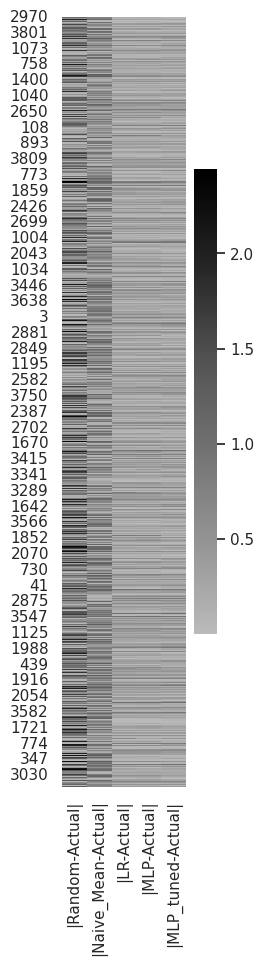

Random Naive_Mean        LR       MLP  MLP_tuned         DT
ME    0.009286   0.006056  0.005497 -0.018405   0.022705   0.027436
RMSE   0.99887   0.712422  0.359661  0.358357   0.354216   0.603742
MAE   0.807717   0.615562  0.291984  0.290092   0.286893   0.411026
MAPE  22.54355    17.3065  8.136828  8.136134   7.881881  11.343539

In [ ]:
# @title
sales_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005,random_state=3)

sales_mlp.fit(X_train_s, y_train_s)
result_df['MLP_tuned'] = sales_mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|MLP_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()
m='MLP_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

Conclusión

---

En el gráfico se puede ver claramente que los ultimos 3 modelos dan valores similares y son mejores que los 2 primeros.
El ultimo modelo de MLP ajustado, da un poco mejor que los anteirores

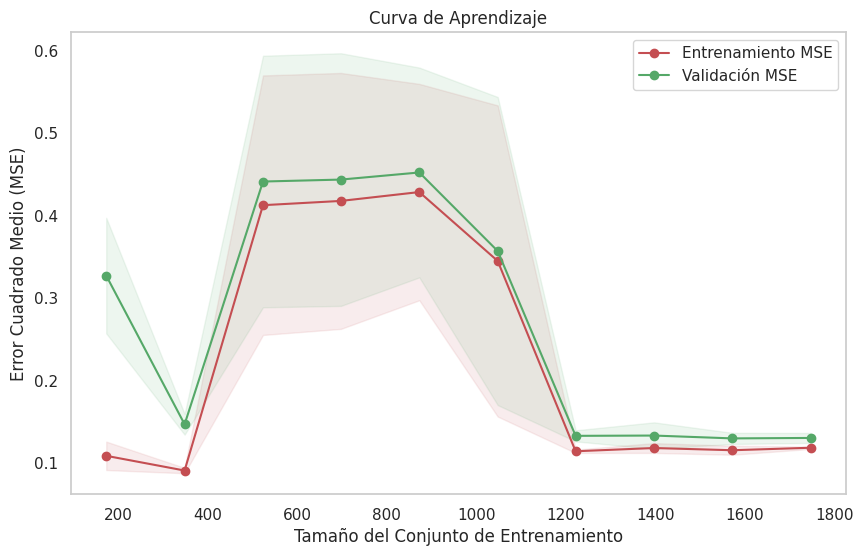

In [ ]:
# @title
from sklearn.model_selection import learning_curve

# Define el modelo MLPRegressor (sales_mlp) y los datos (X_train_s, y_train_s)

# Define un rango de tamaños de conjunto de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)  # Puedes ajustar los valores según tus necesidades

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    sales_mlp, X_train_s, y_train_s, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calcula los promedios y las desviaciones estándar de los puntajes
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error Cuadrado Medio (MSE)")
plt.grid()

# Grafica las curvas de entrenamiento y validación
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Entrenamiento MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validación MSE")

plt.legend(loc="best")
plt.show()

Conclusión

---

Como es de esperar el modelo comienza con un error de entrenamiento y validación bastante diferentes, pero a lo largo de del entrenamiento estos errores van siendo similares.

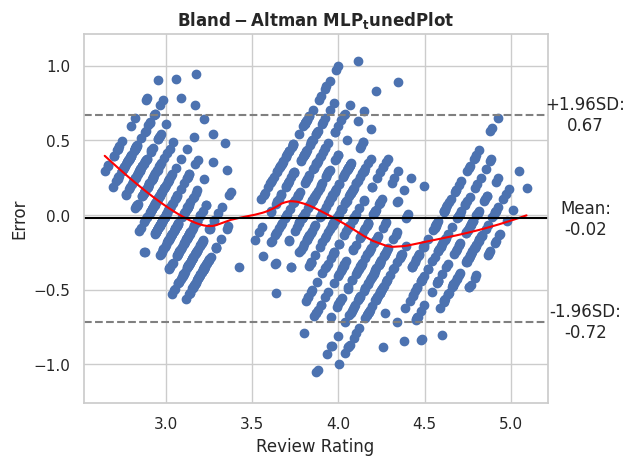

In [ ]:
# @title
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1 = np.asarray(data1)
    data2 = np.asarray(data2)
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2  # Diferencia entre data1 y data2
    md = np.mean(diff)  #Moda de la diferencia
    sd = np.std(diff, axis=0)  # Desviación estandar de la diferencia
    CI_low = md - 1.96 * sd
    CI_high = md + 1.96 * sd
    lowess = sm.nonparametric.lowess(diff, mean, frac=0.5)

    plt.scatter(mean, diff, *args, **kwargs)
    plt.plot(lowess[:, 0], lowess[:, 1], color='red')
    plt.axhline(md, color='black', linestyle='-')
    plt.axhline(md + 1.96 * sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96 * sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high


md, sd, mean, CI_low, CI_high = bland_altman_plot(result_df['MLP_tuned'], result_df.Actual)

plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{MLP_tuned Plot}$")
plt.xlabel("Review Rating")
plt.ylabel("Error")
plt.ylim(md - 3.5 * sd, md + 3.5 * sd)

BA_plot = np.min(mean) + (np.max(mean) - np.min(mean)) * 1.14

plt.text(BA_plot, md - 1.96 * sd,
         r'-1.96SD:' + "\n" + "%.2f" % CI_low,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md + 1.96 * sd,
         r'+1.96SD:' + "\n" + "%.2f" % CI_high,
         ha="center",
         va="center",
         )
plt.text(BA_plot, md,
         r'Mean:' + "\n" + "%.2f" % md,
         ha="center",
         va="center",
         )
plt.subplots_adjust(right=0.85)

plt.show()

Conclusión

---
Se observa que la media tiende a cero, por lo que no se esta prediciendo con tendencia a mas o a menos.

No se visualizan puntos con grandes errores, son pocos los que se encuentran despues de la desviacoín estandar


## Árbol

A continuación, se probará un modelo de machine learning "menos estadistico", más sofisticado que los de regresión.
Buscando obtener un mejor resultado e insights sobre el dataset

In [ ]:
sales_dt = DecisionTreeRegressor()
sales_dt.fit(X_train,y_train)

DecisionTreeRegressor()

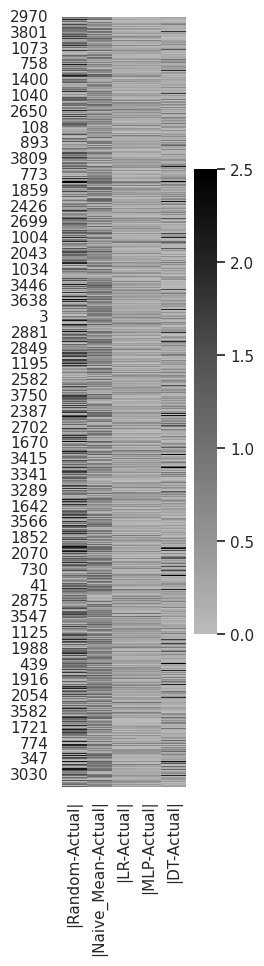

In [ ]:
# @title
result_df['DT'] = sales_dt.predict(X_test)
result_df['|DT-Actual|'] = abs(result_df.DT-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|DT-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

Conclusión

---

Se puede observar que las regresiones lineales son mejor que el metodo del arbol para este caso

Se comparan los errores de los distintos modelos

In [ ]:
# @title
m='DT'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

Random Naive_Mean        LR       MLP  MLP_tuned         DT
ME    0.009286   0.006056  0.005497 -0.018405   0.022705   0.029231
RMSE   0.99887   0.712422  0.359661  0.358357   0.354216   0.606729
MAE   0.807717   0.615562  0.291984  0.290092   0.286893   0.412308
MAPE  22.54355    17.3065  8.136828  8.136134   7.881881  11.383736

Como se visualizaban en los graficos anteriores, los modelos de regresión son los modelos mas ajustados para predecir mejor, seguido por el arbol y por ultimo la media y random.



---




Para ajustar el código según parametros más convenientes, con la función gridsearch itero entre los parametros comunmente mas usados. La idea es mejorar los valores del arbol de decisión.

tener en cuenta que la ejecución de la celda tarda aproximadamente 45 minutos por la comparación e interacción continua.

In [ ]:
# @title
param_grid = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth': [50, 60, 70, 80, 90, 100],
    'min_samples_split': [5, 10, 20, 30, 40],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.24386397042681826
Initial parameters:  {'criterion': 'squared_error', 'max_depth': 60, 'min_impurity_decrease': 0.005, 'min_samples_split': 20, 'splitter': 'best'}


Con los parametros obtenidos se ajusta nuevamente el modelo

In [ ]:
# @title
param_grid = {
    'criterion':['squared_error'],
    'splitter' : ['best'],
    'max_depth': [56,57,58,59,60,61,62,63,64],
    'min_samples_split': [15, 17, 20, 22, 25],
    'min_impurity_decrease': [0.005],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  -0.24386397042681823
Initial parameters:  {'criterion': 'squared_error', 'max_depth': 58, 'min_impurity_decrease': 0.005, 'min_samples_split': 22, 'splitter': 'best'}


In [ ]:
# @title
sales_dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=58,
                           min_samples_split = 22, min_impurity_decrease = 0.005)
sales_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=58, min_impurity_decrease=0.005,
                      min_samples_split=22)

Con los nuevos parametros se vuelve a realizar el metodo de decisión del arbol

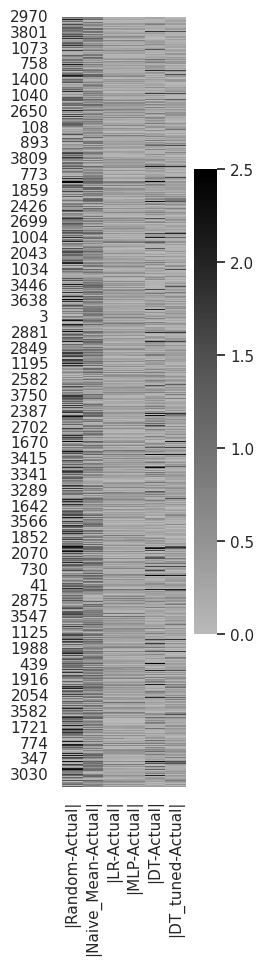

In [ ]:
# @title
result_df['DT_tuned'] = sales_dt.predict(X_test)
result_df['|DT_tuned-Actual|'] = abs(result_df.DT_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|',
                   '|DT-Actual|','|DT_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [ ]:
# @title
m='DT_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

Random Naive_Mean        LR       MLP  MLP_tuned         DT  DT_tuned
ME    0.009286   0.006056  0.005497 -0.018405   0.022705   0.029231  0.020527
RMSE   0.99887   0.712422  0.359661  0.358357   0.354216   0.606729  0.474211
MAE   0.807717   0.615562  0.291984  0.290092   0.286893   0.412308  0.334268
MAPE  22.54355    17.3065  8.136828  8.136134   7.881881  11.383736  9.173884

Conclusión

---

Por mas que el modelo del arbol fue ajustado para arrojar mejores resultados, resulta que el modelo de regresión multiple MLP fue el modelo con menor error y qe mejor predice las calificaciones.